In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass
from typing import Optional
import functions as f

In [2]:
# Load 2022, 2023 and 2024 datasets
def load_all_sim_data():
    data_2022 = pd.read_csv('data/f1sim-data-2022.csv', low_memory=False)
    data_2023 = pd.read_csv('data/f1sim-data-2023.csv', low_memory=False)
    data_2024 = pd.read_csv('data/F124 Data Export UNSW.csv',low_memory=False)
    return data_2022, data_2023, data_2024

In [3]:
#data_2022, data_2023, data_2024 = load_all_sim_data()
data_2022 = pd.read_csv('./../f1sim-data-2022.csv')
data_2023 = pd.read_csv('./../f1sim-data-2023.csv')
data_2024= pd.read_csv('./../F124 Data Export UNSW.csv')


/var/folders/df/yycwwb894zs3xdxg68xg04mm0000gn/T/ipykernel_788/4048221277.py:4: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2024= pd.read_csv('./../F124 Data Export UNSW.csv')


In [4]:
pd.set_option('display.max_rows', 1000) 

In [16]:
print(data_2022.columns)

Index(['SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR', 'LAP_DISTANCE',
       'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS', 'SECTOR_2_TIME_MS',
       'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH', 'THROTTLE', 'BRAKE', 'GEAR',
       'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH', 'ROLL', 'WORLDPOSX',
       'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY',
       'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY',
       'WORLDRIGHTDIRZ'],
      dtype='object')


In [17]:
# Load 2024 dataset with same columns as 2022/2023
def load_2024_data_reformatted():
    data_2024 = pd.read_csv('data/F124 Data Export UNSW.csv', low_memory=False)
    new_data_2024 = data_2024[[
        "M_SESSIONUID", # could be R_SESSION, not sure
        "M_FRAMEIDENTIFIER",
        "M_CURRENTLAPNUM",
        "M_SECTOR_1",
        "M_LAPDISTANCE_1", ##lap dist - double check this col, seems to be slightly different data types
        "M_CURRENTLAPTIMEINMS_1",
        "M_SECTOR1TIMEINMS",
        "M_SECTOR2TIMEINMS",
        "M_LAPTIMEINMS",
        "M_SECTOR3TIMEINMS",
        "M_SPEED_1",
        "M_THROTTLE_1",
        "M_BRAKE_1",
        "M_GEAR_1",
        "M_ENGINERPM_1",
        "M_STEER_1",
        "M_YAW_1",
        "M_PITCH_1",
        "M_ROLL_1",
        "M_WORLDPOSITIONX_1",
        "M_WORLDPOSITIONY_1",
        "M_WORLDPOSITIONZ_1",
        "M_WORLDFORWARDDIRX_1",
        "M_WORLDFORWARDDIRY_1",
        "M_WORLDFORWARDDIRZ_1",
        "M_WORLDRIGHTDIRX_1",
        "M_WORLDRIGHTDIRY_1",
        "M_WORLDRIGHTDIRZ_1"
    ]]
    new_data_2024.columns = [
        "SESSION_IDENTIFIER",
        "FRAME",
        "LAP_NUM",
        "SECTOR",
        "LAP_DISTANCE",
        "CURRENT_LAP_TIME_MS",  
        "SECTOR_1_TIME_MS",
        "SECTOR_2_TIME_MS",
        "LAP_TIME_MS",
        "SECTOR_3_MS",
        "SPEED_KPH",
        "THROTTLE",
        "BRAKE",
        "GEAR",
        "ENGINE_RPM",
        "STEERING",
        "YAW",
        "PITCH",
        "ROLL",
        "WORLDPOSX",
        "WORLDPOSY",
        "WORLDPOSZ", 
        "WORLDFORWARDDIRX",
        "WORLDFORWARDDIRY",
        "WORLDFORWARDDIRZ",
        "WORLDRIGHTDIRX",
        "WORLDRIGHTDIRY",
        "WORLDRIGHTDIRZ",
    ]
    return new_data_2024

In [18]:
def load_2024_data_reformatted_extra_info():
    data_2024 = pd.read_csv('data/F124 Data Export UNSW.csv', low_memory=False)
    new_data_2024 = data_2024[[
        "M_SESSIONUID", # could be R_SESSION, not sure
        "M_FRAMEIDENTIFIER",
        "M_CURRENTLAPNUM", # could be M_CURRENTLAPNUM_1
        "M_SECTOR_1",
        "M_LAPDISTANCE_1", ##lap dist - double check this col
        "M_CURRENTLAPTIMEINMS_1",
        "M_SECTOR1TIMEINMS",
        "M_SECTOR2TIMEINMS",
        "M_LAPTIMEINMS",
        "M_SECTOR3TIMEINMS",
        "M_SPEED_1",
        "M_THROTTLE_1",
        "M_BRAKE_1",
        "M_GEAR_1",
        "M_ENGINERPM_1",
        "M_STEER_1",
        "M_YAW_1",
        "M_PITCH_1",
        "M_ROLL_1",
        "M_WORLDPOSITIONX_1",
        "M_WORLDPOSITIONY_1",
        "M_WORLDPOSITIONZ_1",
        "M_WORLDFORWARDDIRX_1",
        "M_WORLDFORWARDDIRY_1",
        "M_WORLDFORWARDDIRZ_1",
        "M_WORLDRIGHTDIRX_1",
        "M_WORLDRIGHTDIRY_1",
        "M_WORLDRIGHTDIRZ_1",
        # extra info columns -> could be useful to test functions which generate this for 2022/23
        "M_LAPINVALID", # could be M_CURRENTLAPINVALID_1
        "M_LASTLAPTIMEINMS_1",
        "M_SECTOR1TIMEMSPART_1",
        "M_SECTOR2TIMEMSPART_1",
        "M_TOTALDISTANCE_1",
        "TURN",
        "M_FRONTWHEELSANGLE"
    ]]
    new_data_2024.columns = [
        "SESSION_IDENTIFIER",
        "FRAME",
        "LAP_NUM",
        "SECTOR",
        "LAP_DISTANCE",
        "CURRENT_LAP_TIME_MS",  
        "SECTOR_1_TIME_MS",
        "SECTOR_2_TIME_MS",
        "LAP_TIME_MS",
        "SECTOR_3_MS",
        "SPEED_KPH",
        "THROTTLE",
        "BRAKE",
        "GEAR",
        "ENGINE_RPM",
        "STEERING",
        "YAW",
        "PITCH",
        "ROLL",
        "WORLDPOSX",
        "WORLDPOSY",
        "WORLDPOSZ", 
        "WORLDFORWARDDIRX",
        "WORLDFORWARDDIRY",
        "WORLDFORWARDDIRZ",
        "WORLDRIGHTDIRX",
        "WORLDRIGHTDIRY",
        "WORLDRIGHTDIRZ",
        "M_LAPINVALID", 
        "M_LASTLAPTIMEINMS_1",
        "M_SECTOR1TIMEMSPART_1",
        "M_SECTOR2TIMEMSPART_1",
        "M_TOTALDISTANCE_1",
        "TURN",
        "M_FRONTWHEELSANGLE"
    ]
    return new_data_2024

In [19]:
new_2024 = load_2024_data_reformatted()

In [20]:
new_extra_2024 = load_2024_data_reformatted_extra_info()

# Notes about all columns in 2024 data - are they needed, what is their corresponding 2022/23

    2024 columns to drop (and reasons)
    - ID: all nan
    - CREATED_ON: metadata about when the simulation was run, not in 22/23
    - GAMEHOST: metadata about the simulation, not in 22/23
    - DEVICENAME: metadata about the simulation, not in 22/23
    - SESSION_GUID: metadata?
    - RACETIME: metadata about date/time of simulation
    - M_TIMESTAMP: not in 2022/23
M_CURRENTLAPNUM: LAP_NUM - lap number at snapshot. Note: 24 has 1-5 (gradually decreasing), 22/23 has 1-21 (gradually decreasing)
    - M_PACKETFORMAT: ??, all '2024'
M_LAPTIMEINMS: LAP_TIME_MS
M_SECTOR1TIMEINMS: SECTOR_1_TIME_MS
M_SECTOR2TIMEINMS: SECTOR_2_TIME_MS
M_SECTOR3TIMEINMS: SECTOR_3_MS
    *M_LAPINVALID
    - SECTOR3TIME: in hh:mm:ss:ms format, given in ms format elsewhere
    *M_LASTLAPTIMEINMS_1
M_CURRENTLAPTIMEINMS_1: CURRENT_LAP_TIME_MS
    *M_SECTOR1TIMEMSPART_1
    *M_SECTOR1TIMEMINUTESPART_1
    *M_SECTOR2TIMEMSPART_1
    - M_SECTOR2TIMEMINUTESPART_1: all '0'
    ********M_LAPDISTANCE_1: LAP_DISTANCE
    *M_TOTALDISTANCE_1
    - M_CARPOSITION_1: all nan
    *M_CURRENTLAPNUM_1
M_SECTOR_1: SECTOR
    *M_CURRENTLAPINVALID_1
    - M_CORNERCUTTINGWARNINGS_1: all nan
    - M_DRIVERSTATUS_1: all '1'
M_WORLDPOSITIONX_1: WORLDPOSX
M_WORLDPOSITIONY_1: WORLDPOSY
M_WORLDPOSITIONZ_1: WORLDPOSZ
    - M_WORLDVELOCITYX_1: all nan
    - M_WORLDVELOCITYY_1: all nan
    - M_WORLDVELOCITYZ_1: all nan
M_WORLDFORWARDDIRX_1: WORLDFORWARDDIRX
M_WORLDFORWARDDIRY_1: WORLDFORWARDDIRY
M_WORLDFORWARDDIRZ_1: WORLDFORWARDDIRZ
M_WORLDRIGHTDIRX_1: WORLDRIGHTDIRX
M_WORLDRIGHTDIRY_1: WORLDRIGHTDIRY
M_WORLDRIGHTDIRZ_1: WORLDRIGHTDIRZ
    - M_GFORCELATERAL_1: all nan
    - M_GFORCELONGITUDINAL_1: all nan
    - M_GFORCEVERTICAL_1: all nan
M_YAW_1: YAW
M_PITCH_1: PITCH
M_ROLL_1: ROLL
M_SPEED_1: SPEED_KPH
M_THROTTLE_1: THROTTLE
M_STEER_1: STEERING
M_BRAKE_1: BRAKE
M_GEAR_1: GEAR - vehicle gear at snapshot
M_ENGINERPM_1: ENGINE_RPM
    *M_DRS_1: not in 2022/23
    - M_BRAKESTEMPERATURE_RL_1: not in 2022/23
    - M_BRAKESTEMPERATURE_RR_1: not in 2022/23
    - M_BRAKESTEMPERATURE_FL_1: not in 2022/23
    - M_BRAKESTEMPERATURE_FR_1: not in 2022/23
    - M_TYRESSURFACETEMPERATURE_RL_1: not in 2022/23
    - M_TYRESSURFACETEMPERATURE_RR_1: not in 2022/23
    - M_TYRESSURFACETEMPERATURE_FL_1: not in 2022/23
    - M_TYRESSURFACETEMPERATURE_FR_1: not in 2022/23
    - M_TYRESINNERTEMPERATURE_RL_1: not in 2022/23
    - M_TYRESINNERTEMPERATURE_RR_1: not in 2022/23
    - M_TYRESINNERTEMPERATURE_FL_1: not in 2022/23
    - M_TYRESINNERTEMPERATURE_FR_1: not in 2022/23
    - M_ENGINETEMPERATURE_1: not in 2022/23
    - M_TYRESPRESSURE_RL_1: not in 2022/23
    - M_TYRESPRESSURE_RR_1: not in 2022/23
    - M_TYRESPRESSURE_FL_1: not in 2022/23
    - M_TYRESPRESSURE_FR_1: not in 2022/23
    - M_GAMEMAJORVERSION: not in 2022/23
    - M_GAMEMINORVERSION: not in 2022/23
    *M_SESSIONUID
    - M_SESSIONTIME: all nan
    *M_FRAMEIDENTIFIER: FRAME
    - M_OVERALLFRAMEIDENTIFIER: all nan
    *R_SESSION
    - R_NAME: person's name, irrelevant
    - R_TRACKID: all same (all same track)
    - R_GAMEHOST: irrelevant
    - R_FAV_TEAM: irrelevant
    *R_STATUS: ???
    ******LAPTIME
    - SECTOR1TIME: given in hh:mm:ss:ms, ms format in another col
    - SECTOR2TIME: given in hh:mm:ss:ms, ms format in another col
    ******CURRENTLAPTIME
    - FRAMEID: all nan
    *TURN
    *M_FRONTWHEELSANGLE
    - M_TOTALLAPS: all nan
    - M_TRACKLENGTH: not sure why it varies. not in 2022/23
    - M_TRACKID: all 0
    - Unnamed: 93: all nan

In [21]:
# Notes about all columns in 2024 data - are they needed, what is their corresponding 2022/23

"""
    2024 columns to drop (and reasons)
    - ID: all nan
    - CREATED_ON: metadata about when the simulation was run, not in 22/23
    - GAMEHOST: metadata about the simulation, not in 22/23
    - DEVICENAME: metadata about the simulation, not in 22/23
    - SESSION_GUID: metadata?
    - RACETIME: metadata about date/time of simulation
    - M_TIMESTAMP: not in 2022/23
M_CURRENTLAPNUM: LAP_NUM - lap number at snapshot. Note: 24 has 1-5 (gradually decreasing), 22/23 has 1-21 (gradually decreasing)
    - M_PACKETFORMAT: ??, all '2024'
M_LAPTIMEINMS: LAP_TIME_MS
M_SECTOR1TIMEINMS: SECTOR_1_TIME_MS
M_SECTOR2TIMEINMS: SECTOR_2_TIME_MS
M_SECTOR3TIMEINMS: SECTOR_3_MS
    *M_LAPINVALID
    - SECTOR3TIME: in hh:mm:ss:ms format, given in ms format elsewhere
    *M_LASTLAPTIMEINMS_1
M_CURRENTLAPTIMEINMS_1: CURRENT_LAP_TIME_MS
    *M_SECTOR1TIMEMSPART_1
    *M_SECTOR1TIMEMINUTESPART_1
    *M_SECTOR2TIMEMSPART_1
    - M_SECTOR2TIMEMINUTESPART_1: all '0'
    ********M_LAPDISTANCE_1: LAP_DISTANCE
    *M_TOTALDISTANCE_1
    - M_CARPOSITION_1: all nan
    *M_CURRENTLAPNUM_1
M_SECTOR_1: SECTOR
    *M_CURRENTLAPINVALID_1
    - M_CORNERCUTTINGWARNINGS_1: all nan
    - M_DRIVERSTATUS_1: all '1'
M_WORLDPOSITIONX_1: WORLDPOSX
M_WORLDPOSITIONY_1: WORLDPOSY
M_WORLDPOSITIONZ_1: WORLDPOSZ
    - M_WORLDVELOCITYX_1: all nan
    - M_WORLDVELOCITYY_1: all nan
    - M_WORLDVELOCITYZ_1: all nan
M_WORLDFORWARDDIRX_1: WORLDFORWARDDIRX
M_WORLDFORWARDDIRY_1: WORLDFORWARDDIRY
M_WORLDFORWARDDIRZ_1: WORLDFORWARDDIRZ
M_WORLDRIGHTDIRX_1: WORLDRIGHTDIRX
M_WORLDRIGHTDIRY_1: WORLDRIGHTDIRY
M_WORLDRIGHTDIRZ_1: WORLDRIGHTDIRZ
    - M_GFORCELATERAL_1: all nan
    - M_GFORCELONGITUDINAL_1: all nan
    - M_GFORCEVERTICAL_1: all nan
M_YAW_1: YAW
M_PITCH_1: PITCH
M_ROLL_1: ROLL
M_SPEED_1: SPEED_KPH
M_THROTTLE_1: THROTTLE
M_STEER_1: STEERING
M_BRAKE_1: BRAKE
M_GEAR_1: GEAR - vehicle gear at snapshot
M_ENGINERPM_1: ENGINE_RPM
    *M_DRS_1: not in 2022/23
    - M_BRAKESTEMPERATURE_RL_1: not in 2022/23
    - M_BRAKESTEMPERATURE_RR_1: not in 2022/23
    - M_BRAKESTEMPERATURE_FL_1: not in 2022/23
    - M_BRAKESTEMPERATURE_FR_1: not in 2022/23
    - M_TYRESSURFACETEMPERATURE_RL_1: not in 2022/23
    - M_TYRESSURFACETEMPERATURE_RR_1: not in 2022/23
    - M_TYRESSURFACETEMPERATURE_FL_1: not in 2022/23
    - M_TYRESSURFACETEMPERATURE_FR_1: not in 2022/23
    - M_TYRESINNERTEMPERATURE_RL_1: not in 2022/23
    - M_TYRESINNERTEMPERATURE_RR_1: not in 2022/23
    - M_TYRESINNERTEMPERATURE_FL_1: not in 2022/23
    - M_TYRESINNERTEMPERATURE_FR_1: not in 2022/23
    - M_ENGINETEMPERATURE_1: not in 2022/23
    - M_TYRESPRESSURE_RL_1: not in 2022/23
    - M_TYRESPRESSURE_RR_1: not in 2022/23
    - M_TYRESPRESSURE_FL_1: not in 2022/23
    - M_TYRESPRESSURE_FR_1: not in 2022/23
    - M_GAMEMAJORVERSION: not in 2022/23
    - M_GAMEMINORVERSION: not in 2022/23
    *M_SESSIONUID
    - M_SESSIONTIME: all nan
    *M_FRAMEIDENTIFIER: FRAME
    - M_OVERALLFRAMEIDENTIFIER: all nan
    *R_SESSION
    - R_NAME: person's name, irrelevant
    - R_TRACKID: all same (all same track)
    - R_GAMEHOST: irrelevant
    - R_FAV_TEAM: irrelevant
    *R_STATUS: ???
    ******LAPTIME
    - SECTOR1TIME: given in hh:mm:ss:ms, ms format in another col
    - SECTOR2TIME: given in hh:mm:ss:ms, ms format in another col
    ******CURRENTLAPTIME
    - FRAMEID: all nan
    *TURN
    *M_FRONTWHEELSANGLE
    - M_TOTALLAPS: all nan
    - M_TRACKLENGTH: not sure why it varies. not in 2022/23
    - M_TRACKID: all 0
    - Unnamed: 93: all nan
"""

"\n    2024 columns to drop (and reasons)\n    - ID: all nan\n    - CREATED_ON: metadata about when the simulation was run, not in 22/23\n    - GAMEHOST: metadata about the simulation, not in 22/23\n    - DEVICENAME: metadata about the simulation, not in 22/23\n    - SESSION_GUID: metadata?\n    - RACETIME: metadata about date/time of simulation\n    - M_TIMESTAMP: not in 2022/23\nM_CURRENTLAPNUM: LAP_NUM - lap number at snapshot. Note: 24 has 1-5 (gradually decreasing), 22/23 has 1-21 (gradually decreasing)\n    - M_PACKETFORMAT: ??, all '2024'\nM_LAPTIMEINMS: LAP_TIME_MS\nM_SECTOR1TIMEINMS: SECTOR_1_TIME_MS\nM_SECTOR2TIMEINMS: SECTOR_2_TIME_MS\nM_SECTOR3TIMEINMS: SECTOR_3_MS\n    *M_LAPINVALID\n    - SECTOR3TIME: in hh:mm:ss:ms format, given in ms format elsewhere\n    *M_LASTLAPTIMEINMS_1\nM_CURRENTLAPTIMEINMS_1: CURRENT_LAP_TIME_MS\n    *M_SECTOR1TIMEMSPART_1\n    *M_SECTOR1TIMEMINUTESPART_1\n    *M_SECTOR2TIMEMSPART_1\n    - M_SECTOR2TIMEMINUTESPART_1: all '0'\n    ********M_LAPDI

## Trying to find the best laps

In [22]:
data_2022.columns

Index(['SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR', 'LAP_DISTANCE',
       'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS', 'SECTOR_2_TIME_MS',
       'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH', 'THROTTLE', 'BRAKE', 'GEAR',
       'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH', 'ROLL', 'WORLDPOSX',
       'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY',
       'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY',
       'WORLDRIGHTDIRZ'],
      dtype='object')

In [23]:
data_2022['LAP_TIME_MS'].min()

80257

In [24]:
data_2023['LAP_TIME_MS'].min()

80522.0

In [25]:
data_2022['LAP_TIME_MS'].min()

80257

## How to find acceleration points

In [26]:
data_2022, data_2023, data_2024 = load_all_sim_data()

In [27]:
df_1 = fastest_2023_time_in_range[ fastest_2023_time_in_range['LAP_DISTANCE'] > 300] #.reset_index()
df_2 = df_1[ df_1['LAP_DISTANCE'] < 363].reset_index()
df_3 = df_1[ df_1['LAP_DISTANCE'] < 348].reset_index()
throttle_end = df_3[df_3['THROTTLE'] == 0].iloc[0]

NameError: name 'fastest_2023_time_in_range' is not defined

In [ ]:
throttle_end

level_0                6.800000e+01
index                  8.219110e+05
SESSION_IDENTIFIER     4.486622e+18
FRAME                  1.071300e+04
LAP_NUM                7.000000e+00
SECTOR                 0.000000e+00
LAP_DISTANCE           3.034727e+02
CURRENT_LAP_TIME_MS    3.420000e+03
SECTOR_1_TIME_MS       2.810500e+04
SECTOR_2_TIME_MS       1.774300e+04
LAP_TIME_MS            8.052200e+04
SECTOR_3_MS            3.467400e+04
SPEED_KPH              2.550000e+02
THROTTLE               0.000000e+00
BRAKE                  1.000000e+00
GEAR                   7.000000e+00
ENGINE_RPM             9.915000e+03
STEERING               0.000000e+00
YAW                   -2.331556e+00
PITCH                 -5.073786e-03
ROLL                  -1.731434e-02
WORLDPOSX              3.317632e+02
WORLDPOSY              2.573976e+02
WORLDPOSZ              1.889329e+00
WORLDFORWARDDIRX      -2.373300e+04
WORLDFORWARDDIRY       1.660000e+02
WORLDFORWARDDIRZ      -2.259100e+04
WORLDRIGHTDIRX         2.259

In [ ]:
df_1

index   SESSION_IDENTIFIER  FRAME  LAP_NUM  SECTOR  LAP_DISTANCE  \
68   821911  4486621736790788971  10713        7       0    303.472656   
69   821912  4486621736790788971  10714        7       0    306.968750   
70   821913  4486621736790788971  10716        7       0    310.375000   
71   821914  4486621736790788971  10717        7       0    313.695312   
72   821915  4486621736790788971  10718        7       0    315.857422   
..      ...                  ...    ...      ...     ...           ...   
233  822076  4486621736790788971  10892        7       0    831.044922   
234  822077  4486621736790788971  10893        7       0    835.210938   
235  822078  4486621736790788971  10894        7       0    839.384766   
236  822079  4486621736790788971  10895        7       0    843.570312   
237  822080  4486621736790788971  10896        7       0    847.765625   

     CURRENT_LAP_TIME_MS  SECTOR_1_TIME_MS  SECTOR_2_TIME_MS  LAP_TIME_MS  \
68                  3420             28105             17743      80522.0   
69                  3470             28105             17743      80522.0   
70                  3520             28105             17743      80522.0   
71                  3570             28105             17743      80522.0   
72                  3603             28105             17743      80522.0   
..                   ...               ...               ...          ...   
233                11661             28105             17743      80522.0   
234                11711             28105             17743      80522.0   
235                11761             28105             17743      80522.0   
236                11811             28105             17743      80522.0   
237                11861             28105             17743      80522.0   

     ...      ROLL   WORLDPOSX   WORLDPOSY  WORLDPOSZ  WORLDFORWARDDIRX  \
68   ... -0.017314  331.763153  257.397644   1.889329          -23733.0   
69   ... -0.015758  334.296906  254.986877   1.908696          -23733.0   
70   ... -0.013554  336.765350  252.638687   1.932137          -23733.0   
71   ... -0.010653  339.172852  250.348663   1.958481          -23731.0   
72   ... -0.008589  340.739624  248.858383   1.978479          -23730.0   
..   ...       ...         ...         ...        ...               ...   
233  ...  0.006787  587.814148 -158.008606   3.006222          -20696.0   
234  ...  0.005321  590.448059 -161.233902   2.991544          -20709.0   
235  ...  0.004782  593.086792 -164.467255   2.978422          -20718.0   
236  ...  0.004493  595.731628 -167.707611   2.969091          -20722.0   
237  ...  0.004393  598.382507 -170.954773   2.961383          -20723.0   

     WORLDFORWARDDIRY  WORLDFORWARDDIRZ  WORLDRIGHTDIRX  WORLDRIGHTDIRY  \
68              166.0          -22591.0         22590.0           567.0   
69              221.0          -22590.0         22590.0           516.0   
70              240.0          -22591.0         22591.0           444.0   
71              298.0          -22591.0         22593.0           349.0   
72              321.0          -22592.0         22594.0           281.0   
..                ...               ...             ...             ...   
233             -96.0          -25403.0         25403.0          -222.0   
234            -101.0          -25392.0         25392.0          -174.0   
235             -71.0          -25385.0         25385.0          -156.0   
236             -51.0          -25382.0         25382.0          -147.0   
237             -53.0          -25381.0         25380.0          -143.0   

     WORLDRIGHTDIRZ  
68         -23728.0  
69         -23729.0  
70         -23729.0  
71         -23729.0  
72         -23729.0  
..              ...  
233        -20695.0  
234        -20709.0  
235        -20718.0  
236        -20722.0  
237        -20723.0  

[170 rows x 29 columns]

In [ ]:
@dataclass
class XYPos:
    x_loc: float
    y_loc: float
    lap_dist: float

@dataclass
class DistFromEdges:
    left_dist: float
    right_dist: float

In [ ]:
@dataclass
class infoAtPoint:
    abs_location: XYPos
    relative_location: DistFromEdges
    time: float
    speed: float
    throttle_value: Optional[float]

In [ ]:
def between_turns_acceleration_info(df: pd.DataFrame) -> infoAtPoint, infoAtPoint, infoAtPoint:
    # find acceleration starting point
    df_1 = df[ df['LAP_DISTANCE'] > 300]

    throttle_start = df_1[df_1['THROTTLE'] > 0].iloc[0]
    throttle_start_loc = XYPos(
        x_pos = throttle_start['WORLDPOSX'], 
        y_pos = throttle_start['WORLDPOSY'],
        lap_dist = throttle_start['LAP_DISTANCE']
    )
    throttle_start_relative_loc = DistFromEdges(
        left_dist = 1
        right_dist = 1
    )
    throttle_start_time = throttle_start['CURRENT_LAP_TIME_MS'] # relative to other stuff
    throttle_start_speed = throttle_start['SPEED_KPH']

    start_acceleration_info = infoAtPoint(
        abs_location = throttle_start_loc,
        relative_location = throttle_start_relative_loc,
        time = throttle_start_time,
        speed = throttle_start_speed
    )

    df_2 = df_1[ df_1['LAP_DISTANCE'] < 363].reset_index()
    throttle_max = df_2[df_2['THROTTLE'] == df_2['THROTTLE'].max()].iloc[0]
    max_throttle_value = throttle_max['THROTTLE']
    max_throttle_lap_loc = XYPos(
        x_pos = throttle_max['WORLDPOSX'], 
        y_pos = throttle_max['WORLDPOSY'],
        lap_dist = throttle_max['LAP_DISTANCE']
    )
    max_throttle_relative_loc = DistFromEdges(
        left_dist = 1,
        right_dist = 1
    )
    max_throttle_time = throttle_max['CURRENT_LAP_TIME_MS'] #relative to turning/breaking
    max_throttle_speed = throttle_max['SPEED_KPH']
    max_acceleration_info = infoAtPoint(
        abs_location = max_throttle_lap_loc,
        relative_location = max_throttle_relative_loc,
        time = max_throttle_time,
        speed = max_throttle_speed,
        throttle_value = max_throttle_value
    )

    df_3 = df_1[ df_1['LAP_DISTANCE'] < 348].reset_index()
    throttle_end = df_3[df_3['THROTTLE'] == 0].iloc[0]
    throttle_end_loc = XYPos(
        x_pos = throttle_end['WORLDPOSX'],
        y_pos = throttle_end['WORLDPOSY'],
        lap_dist = throttle_end['LAP_DISTANCE']
    )
    throttle_end_relative_loc = DistFromEdges(
        left_dist = 1,
        right_dist = 1
    )
    throttle_end_time = throttle_end['CURRENT_LAP_TIME_MS']
    throttle_end_speed = throttle_end['SPEED_KPH']
    end_acceleration_info = infoAtPoint(
        abs_location = throttle_end_loc,
        relative_location = throttle_end_relative_loc,
        time = throttle_end_time,
        speed = throttle_end_speed
    )
    
    

SyntaxError: invalid syntax (2636987694.py, line 1)

In [ ]:
def after_turn2_acceleration(df: pd.DataFrame) -> infoAtPoint, infoAtPoint:
    df_1 = df[ df['LAP_DISTANCE'] > 362]
    throttle_start = df_1[df_1['THROTTLE'] > 0].iloc[0]
    throttle_start_loc = XYPos(
        x_pos = throttle_start['WORLDPOSX'], 
        y_pos = throttle_start['WORLDPOSY'],
        lap_dist = throttle_start['LAP_DISTANCE']
    )
    throttle_start_relative_loc = DistFromEdges(
        left_dist = 1,
        right_dist = 1
    )
    throttle_start_time = throttle_start['CURRENT_LAP_TIME_MS'] # relative to other stuff
    throttle_start_speed = throttle_start['SPEED_KPH']
    start_acceleration_info = infoAtPoint(
        abs_location = throttle_start_loc,
        relative_location = throttle_start_relative_loc,
        time = throttle_start_time,
        speed = throttle_start_speed
    )

    throttle_max = df_2[df_2['THROTTLE'] == df_2['THROTTLE'].max()].iloc[0]
    max_throttle_value = throttle_max['THROTTLE']
    max_throttle_lap_loc = XYPos(
        x_pos = throttle_max['WORLDPOSX'],
        y_pos = throttle_max['WORLDPOSY'],
        lap_dist = throttle_max['LAP_DIST']
    )
    throttle_end_relative_loc = DistFromEdges(
        left_dist = 1,
        right_dist = 1
    )
    max_throttle_time = throttle_max['CURRENT_LAP_TIME_MS'] #relative to turning/breaking
    max_throttle_speed = throttle_max['SPEED_KPH']
    end_acceleration_info = infoAtPoint(
        abs_location = throttle_end_loc,
        relative_location = throttle_end_relative_loc,
        time = throttle_end_time,
        speed = throttle_end_speed
    )


SyntaxError: invalid syntax (2481783914.py, line 1)

In [ ]:
print(data_2022['SESSION_IDENTIFIER'].unique().size)
print(data_2022['LAP_TIME_MS'].unique().size)
print(data_2022.drop_duplicates(subset = ['SESSION_IDENTIFIER', 'LAP_NUM']).shape[0])

324
829
841


In [ ]:
print(data_2023['SESSION_IDENTIFIER'].unique().size)
print(data_2023['LAP_TIME_MS'].unique().size)
print(data_2023.drop_duplicates(subset = ['SESSION_IDENTIFIER', 'LAP_NUM']).shape[0])

189
516
519


In [ ]:
# Fastest lap in 2022
fastest_2022_time = data_2022[data_2022['LAP_TIME_MS'] == data_2022['LAP_TIME_MS'].min()].reset_index()
print(fastest_2022_time)

     index    SESSION_IDENTIFIER  FRAME  LAP_NUM  SECTOR  LAP_DISTANCE  \
0   182296  14054303838250777198   6131        4       0    318.931641   
1   182297  14054303838250777198   6184        4       0    470.285156   
2   182298  14054303838250777198   6198        4       0    515.083984   
3   182299  14054303838250777198   6217        4       0    577.927734   
4   182300  14054303838250777198   6242        4       0    669.851562   
5   182301  14054303838250777198   6252        4       0    707.462891   
6   182302  14054303838250777198   6269        4       0    768.630859   
7   182303  14054303838250777198   6350        4       0   1077.253906   
8   182304  14054303838250777198   6356        4       0   1088.042969   
9   182305  14054303838250777198   6536        4       0   1528.343750   
10  182306  14054303838250777198   6561        4       0   1619.566406   
11  182307  14054303838250777198   6572        4       0   1657.369141   
12  182308  14054303838250777198   664

In [ ]:
# Fastest lap in 2023
fastest_2023_time = data_2023[data_2023['LAP_TIME_MS'] == data_2023['LAP_TIME_MS'].min()].reset_index()
assert(fastest_2023_time['SESSION_IDENTIFIER'].unique().size == 1)
assert(fastest_2023_time['LAP_NUM'].unique().size == 1)
fastest_2023_time_in_range = fastest_2023_time[fastest_2023_time['LAP_DISTANCE'] < 850]

In [ ]:
throttle_change = np.gradient(fastest_2023_time_in_range['THROTTLE'], fastest_2023_time_in_range['LAP_DISTANCE'])

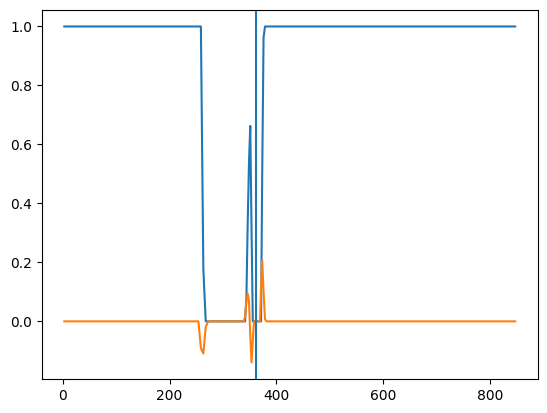

In [ ]:
plt.plot(fastest_2023_time_in_range['LAP_DISTANCE'], fastest_2023_time_in_range['THROTTLE'])
plt.plot(fastest_2023_time_in_range['LAP_DISTANCE'], throttle_change)
plt.axvline(362)

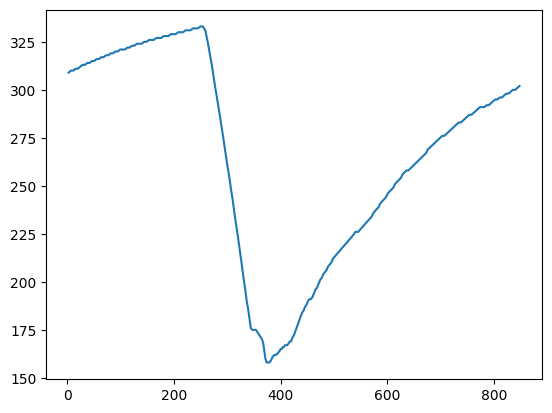

In [ ]:
plt.plot(fastest_2023_time_in_range['LAP_DISTANCE'], fastest_2023_time_in_range['SPEED_KPH'])

In [ ]:
fastest_2023_time.columns

Index(['index', 'SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR',
       'LAP_DISTANCE', 'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS',
       'SECTOR_2_TIME_MS', 'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH',
       'THROTTLE', 'BRAKE', 'GEAR', 'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH',
       'ROLL', 'WORLDPOSX', 'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX',
       'WORLDFORWARDDIRY', 'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX',
       'WORLDRIGHTDIRY', 'WORLDRIGHTDIRZ'],
      dtype='object')

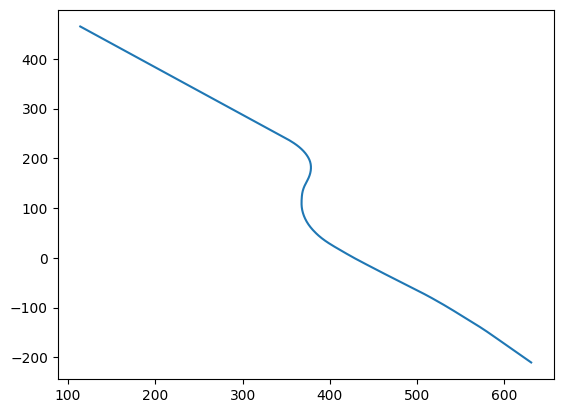

In [ ]:
plt.plot(fastest_2023_time_in_range['WORLDPOSX'], fastest_2023_time_in_range['WORLDPOSY'])

In [ ]:

for i, r in fastest_2023_time.iterrows():
    print(r[['WORLDPOSX', 'WORLDPOSY', 'LAP_DISTANCE']])

WORLDPOSX       114.113495
WORLDPOSY       465.140747
LAP_DISTANCE      2.550781
Name: 0, dtype: float64
WORLDPOSX       117.222603
WORLDPOSY       462.162354
LAP_DISTANCE      6.853516
Name: 1, dtype: float64
WORLDPOSX       120.337997
WORLDPOSY       459.178345
LAP_DISTANCE     11.166016
Name: 2, dtype: float64
WORLDPOSX       123.471466
WORLDPOSY       456.177612
LAP_DISTANCE     15.501953
Name: 3, dtype: float64
WORLDPOSX       126.604469
WORLDPOSY       453.177643
LAP_DISTANCE     19.837891
Name: 4, dtype: float64
WORLDPOSX       129.737427
WORLDPOSY       450.178131
LAP_DISTANCE     24.171875
Name: 5, dtype: float64
WORLDPOSX       132.876083
WORLDPOSY       447.173615
LAP_DISTANCE     28.513672
Name: 6, dtype: float64
WORLDPOSX       136.020142
WORLDPOSY       444.163910
LAP_DISTANCE     32.863281
Name: 7, dtype: float64
WORLDPOSX       139.169662
WORLDPOSY       441.149200
LAP_DISTANCE     37.220703
Name: 8, dtype: float64
WORLDPOSX       142.330582
WORLDPOSY       438.124115
L

random stuff below

In [ ]:
def number_of_moments_in_lap_section(df: pd.DataFrame) -> pd.DataFrame:
    """
    Given a df in 2022/2023 format, calculates how many 'moments'/rows there are for each race's unique laps. 
    It was discovered that a significant amount (especially in 2022) have very few over the section of interest,
    therefore provide very little useful information and should not be used
    The information returned by this function can help make judgements on what laps to cut

    Args:
        df (pd.DataFrame): dataset in 2022/2023 format

    Returns:
        A dataframe with a row for each unique session/lap, and the number of rows from the original df for each over the track section
    """
    data_in_range = df[df['LAP_DISTANCE'] < 750] #TODO change 750, depending on actual lap_distance endpoint
    grouped_data = data_in_range.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).size().reset_index(name = 'count')
    return grouped_data

In [ ]:
data_2022_in_range = data_2022[data_2022['LAP_DISTANCE'] < 750]
data_2023_in_range = data_2023[data_2023['LAP_DISTANCE'] < 750]

In [ ]:
grouped_2022 = data_2022_in_range.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).size().reset_index(name='count')
sorted_grouped_2022 = grouped_2022.sort_values(by='count', ascending=False).reset_index()

grouped_2023 = data_2023_in_range.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).size().reset_index(name='count')
sorted_grouped_2023 = grouped_2023.sort_values(by='count', ascending=False).reset_index()


In [ ]:
num_of_moments_grouped_2022 = sorted_grouped_2022.groupby(['count']).size().reset_index()
num_of_moments_grouped_2023 = sorted_grouped_2023.groupby(['count']).size().reset_index()

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
print(num_of_moments_grouped_2022)

     count   0
0        1   8
1        2  11
2        3  30
3        4  23
4        5  26
5        6  34
6        7  27
7        8  32
8        9  25
9       10  15
10      11  24
11      12  22
12      13  20
13      14  26
14      15  12
15      16  18
16      17  13
17      18  18
18      19   9
19      20   8
20      21   4
21      22  13
22      23   9
23      24   5
24      25   3
25      26   3
26      27   2
27      28   4
28      29   3
29      31   2
30      32   2
31      33   3
32      34   1
33      35   3
34      36   2
35      37   2
36      38   1
37      39   3
38      40   3
39      41   2
40      43   1
41      44   2
42      45   2
43      46   1
44      48   1
45      50   1
46      55   1
47      92   1
48      94   1
49      96   1
50     139   1
51     141   1
52     154   1
53     159   2
54     160   3
55     162   1
56     166   2
57     167   1
58     168   1
59     169   1
60     170   1
61     171   1
62     172   2
63     173   1
64     174   1
65     175

In [ ]:
print(num_of_moments_grouped_2023)

     count   0
0      114   1
1      140   1
2      189   1
3      202   1
4      206   1
5      207   1
6      209   1
7      210   5
8      211   4
9      212   1
10     213   8
11     214   7
12     215   9
13     216  11
14     217  10
15     218  19
16     219  13
17     220  12
18     221  15
19     222  17
20     223  17
21     224  11
22     225  14
23     226  15
24     227   9
25     228   9
26     229  10
27     230   7
28     231  13
29     232   3
30     233  11
31     234   2
32     235   7
33     236   9
34     237   4
35     238   3
36     239   6
37     240   3
38     241   4
39     242   9
40     243   1
41     244   3
42     245   6
43     246   1
44     247   4
45     248   5
46     249   5
47     251   4
48     252   2
49     253   3
50     254   4
51     255   1
52     256   4
53     257   3
54     258   2
55     259   3
56     260   3
57     261   6
58     263   4
59     264   1
60     265   4
61     266   1
62     267   1
63     269   1
64     270   2
65     271

In [ ]:
data_2022

KeyboardInterrupt: 

In [ ]:
print(data_2023[data_2023['WORLDPOSY'].isna()])

           SESSION_IDENTIFIER  FRAME  LAP_NUM  SECTOR  LAP_DISTANCE  \
11033    10419879221391935395   1928        1       2   4196.156250   
11036    10419879221391935395   1932        1       2   4202.051758   
11037    10419879221391935395   1933        1       2   4203.593262   
11039    10419879221391935395   1937        1       2   4210.033203   
11040    10419879221391935395   1938        1       2   4211.708496   
11041    10419879221391935395   1942        1       2   4218.644531   
11042    10419879221391935395   1943        1       2   4220.444336   
11043    10419879221391935395   1947        1       2   4227.918945   
11044    10419879221391935395   1948        1       2   4229.857910   
11045    10419879221391935395   1953        1       2   4240.006348   
11046    10419879221391935395   1958        1       2   4250.866211   
11047    10419879221391935395   1963        1       2   4262.409180   
11048    10419879221391935395   1968        1       2   4274.763672   
11049 

In [ ]:
print(data_2022.columns)

Index(['SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR', 'LAP_DISTANCE',
       'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS', 'SECTOR_2_TIME_MS',
       'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH', 'THROTTLE', 'BRAKE', 'GEAR',
       'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH', 'ROLL', 'WORLDPOSX',
       'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY',
       'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY',
       'WORLDRIGHTDIRZ'],
      dtype='object')


In [ ]:
print(data_2022['CURRENT_LAP_TIME_MS'].min())

0


In [ ]:
def check_data_validity(df: pd.DataFrame) -> None:
    """
    #TODO may need to change/add to this, haven't fully thought out the logic of it
    Check that a given dataset (in 2022/2023 format) is valid, for columns of interest.
    Note: should be used once data is cleaned as a check as this does not fix/remove errors, just identifies them
        
    Args:
        df (pd.DataFrame): dataset in 2022/2023 format
    """
    for i, r in df.iterrows():
        assert r['FRAME'] > 0
        assert r['LAP_NUM'] > 0
        assert r['SECTOR'] in [0, 1, 2]
        assert r['LAP_DISTANCE'] >= 0
        assert r['CURRENT_LAP_TIME_MS'] >= 0
        #assert r['SECTOR_1_TIME_MS'] > 0
        #assert r['SECTOR_2_TIME_MS'] > 0
        #assert r['SECTOR_3_TIME_MS'] > 0
        assert r['LAP_TIME_MS'] > 0
        #assert r['SECTOR_3_MS'] > 0
        assert r['SPEED_KPH'] >= 0
        assert 0 <= r['THROTTLE'] <= 1
        assert 0 <= r['BRAKE'] <= 1
        #assert r['GEAR'] in []
        # rpm
        assert -1 <= r['STEERING'] <= 1
        assert not np.isnan(r['WORLDPOSX'])
        assert not np.isnan(r['WORLDPOSY'])
        assert not np.isnan(r['WORLDPOSZ'])
        assert not np.isnan(r['WORLDFORWARDDIRX'])
        assert not np.isnan(r['WORLDFORWARDDIRY'])
        assert not np.isnan(r['WORLDFORWARDDIRZ'])
        assert not np.isnan(r['WORLDRIGHTDIRX'])
        assert not np.isnan(r['WORLDRIGHTDIRY'])
        assert not np.isnan(r['WORLDRIGHTDIRZ'])
        
        

In [ ]:
check_data_validity(data_2022)

KeyboardInterrupt: 

In [6]:
def number_of_moments_in_lap_section(df: pd.DataFrame) -> pd.DataFrame:
    """
    Given a df in 2022/2023 format, calculates how many 'moments'/rows there are for each race's unique laps. 
    It was discovered that a significant amount (especially in 2022) have very few over the section of interest,
    therefore provide very little useful information and should not be used
    The information returned by this function can help make judgements on what laps to cut

    Args:
        df (pd.DataFrame): dataset in 2022/2023 format

    Returns:
        A dataframe with a row for each unique session/lap, and the number of rows from the original df for each over the track section
    """
    data_in_range = df[df['LAP_DISTANCE'] < 750] #TODO change 750, depending on actual lap_distance endpoint
    grouped_data = data_in_range.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).size().reset_index(name = 'count')
    return grouped_data

In [ ]:
num_rows_2022 = number_of_moments_in_lap_section(data_2022)

In [ ]:

filtered_df = data_2022[(data_2022['LAP_DISTANCE'] < 768) & 
                 (data_2022['SESSION_IDENTIFIER'] == 14101162133662852328) & 
                 (data_2022['LAP_NUM'] == 2)]


filtered_df2 = data_2022[(data_2022['LAP_DISTANCE'] < 768) & 
                 (data_2022['SESSION_IDENTIFIER'] == 1629111953076822936) & 
                 (data_2022['LAP_NUM'] == 1)]

In [ ]:
filtered_df

SESSION_IDENTIFIER  FRAME  LAP_NUM  SECTOR  LAP_DISTANCE  \
182384  14101162133662852328   4070        2       0    677.625488   

        CURRENT_LAP_TIME_MS  SECTOR_1_TIME_MS  SECTOR_2_TIME_MS  LAP_TIME_MS  \
182384                11328             37125             22063       102615   

        SECTOR_3_MS  ...      ROLL   WORLDPOSX  WORLDPOSY  WORLDPOSZ  \
182384        43427  ...  0.017091  482.875061 -46.366261   3.127119   

        WORLDFORWARDDIRX  WORLDFORWARDDIRY  WORLDFORWARDDIRZ  WORLDRIGHTDIRX  \
182384          -24698.0              86.0          -21533.0         21528.0   

        WORLDRIGHTDIRY  WORLDRIGHTDIRZ  
182384          -559.0        -24695.0  

[1 rows x 28 columns]

In [ ]:
def filter_data_single_lap(df, session, lap):
    return df[(df['LAP_DISTANCE'] < 768) & 
                 (df['SESSION_IDENTIFIER'] == session) & 
                 (df['LAP_NUM'] == lap)]

In [ ]:
def plot_race_line(df):
    # Plot track using your custom functions
    f.plot_track_2d(f.load_track_section('data'))
    
    # Drop rows with missing data in 'WORLDPOSX' and 'WORLDPOSY'
    #df = df.dropna(subset=['WORLDPOSX', 'WORLDPOSY'])
    df = df[df['WORLDPOSX'].notna() & df['WORLDPOSY'].notna()]
    
    # Plot race line using scatter for point plotting
    plt.scatter(df['WORLDPOSX'], df['WORLDPOSY'], s=1, c='blue')  # 's' for size, 'c' for color
    plt.xlabel('WORLDPOSX')
    plt.ylabel('WORLDPOSY')
    plt.title('Race Line Plot')
    plt.show()

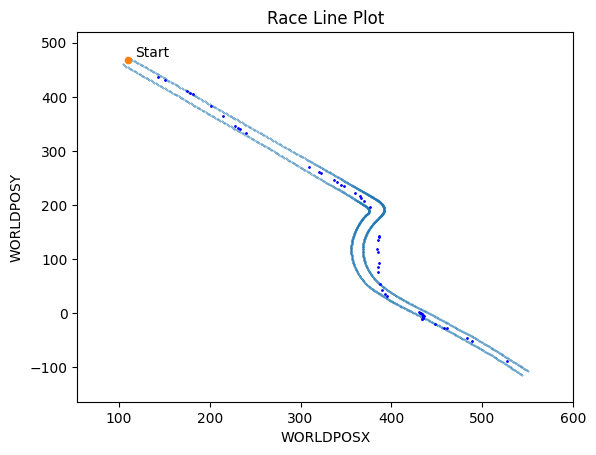

In [ ]:
plot_race_line(filter_data_single_lap(data_2022, 9357610866810738333, 1))


In [25]:
def filter_laps(df):
    grouped = df.groupby(['SESSION_IDENTIFIER', 'LAP_NUM'])
    filtered = grouped.filter(lambda x: len(x) >= 100)

    def has_large_gap(group):
        sorted_distances = group['LAP_DISTANCE'].sort_values()
        gaps = sorted_distances.diff().dropna()  # Calculate differences between consecutive rows
        return (gaps > 15).any()

    cleaned = filtered.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']) #.filter(lambda x: not has_large_gap(x))
    return filtered #cleaned
    

In [22]:
jj = (number_of_moments_in_lap_section(data_2022).groupby(['count']).size().reset_index(name = 'count2'))
print(jj)
ll = (number_of_moments_in_lap_section(data_2023).groupby(['count']).size().reset_index(name = 'count2'))

     count  count2
0        1       8
1        2      11
2        3      30
3        4      23
4        5      26
5        6      34
6        7      27
7        8      32
8        9      25
9       10      15
10      11      24
11      12      22
12      13      20
13      14      26
14      15      12
15      16      18
16      17      13
17      18      18
18      19       9
19      20       8
20      21       4
21      22      13
22      23       9
23      24       5
24      25       3
25      26       3
26      27       2
27      28       4
28      29       3
29      31       2
30      32       2
31      33       3
32      34       1
33      35       3
34      36       2
35      37       2
36      38       1
37      39       3
38      40       3
39      41       2
40      43       1
41      44       2
42      45       2
43      46       1
44      48       1
45      50       1
46      55       1
47      92       1
48      94       1
49      96       1
50     139       1
51     141  

In [25]:
print(data_2024.columns)

Index(['ID', 'CREATED_ON', 'GAMEHOST', 'DEVICENAME', 'SESSION_GUID',
       'RACETIME', 'M_TIMESTAMP', 'M_CURRENTLAPNUM', 'M_PACKETFORMAT',
       'M_LAPTIMEINMS', 'M_SECTOR1TIMEINMS', 'M_SECTOR2TIMEINMS',
       'M_SECTOR3TIMEINMS', 'M_LAPINVALID', 'SECTOR3TIME',
       'M_LASTLAPTIMEINMS_1', 'M_CURRENTLAPTIMEINMS_1',
       'M_SECTOR1TIMEMSPART_1', 'M_SECTOR1TIMEMINUTESPART_1',
       'M_SECTOR2TIMEMSPART_1', 'M_SECTOR2TIMEMINUTESPART_1',
       'M_LAPDISTANCE_1', 'M_TOTALDISTANCE_1', 'M_CARPOSITION_1',
       'M_CURRENTLAPNUM_1', 'M_SECTOR_1', 'M_CURRENTLAPINVALID_1',
       'M_CORNERCUTTINGWARNINGS_1', 'M_DRIVERSTATUS_1', 'M_WORLDPOSITIONX_1',
       'M_WORLDPOSITIONY_1', 'M_WORLDPOSITIONZ_1', 'M_WORLDVELOCITYX_1',
       'M_WORLDVELOCITYY_1', 'M_WORLDVELOCITYZ_1', 'M_WORLDFORWARDDIRX_1',
       'M_WORLDFORWARDDIRY_1', 'M_WORLDFORWARDDIRZ_1', 'M_WORLDRIGHTDIRX_1',
       'M_WORLDRIGHTDIRY_1', 'M_WORLDRIGHTDIRZ_1', 'M_GFORCELATERAL_1',
       'M_GFORCELONGITUDINAL_1', 'M_GFORCEVERTI

In [8]:
data_2024_cols =data_2024[['ID', 'SESSION_GUID','M_LAPTIMEINMS','M_LAPDISTANCE_1','M_WORLDPOSITIONX_1','M_WORLDPOSITIONY_1','M_WORLDPOSITIONZ_1','M_WORLDVELOCITYX_1','M_WORLDVELOCITYY_1','M_WORLDVELOCITYZ_1','M_YAW_1','M_SPEED_1','M_THROTTLE_1','M_STEER_1','M_BRAKE_1','M_CURRENTLAPNUM']]
data_2024_cols=data_2024_cols[data_2024_cols['M_LAPDISTANCE_1']< 750]

In [7]:
def filter_by_group_size_2024(df, group_cols = ['SESSION_GUID', 'M_CURRENTLAPNUM'], min_size=100):
    """
    Filters a DataFrame to only include groups with at least min_size rows.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to filter.
    group_cols (list): The columns to group by.
    min_size (int): The minimum number of rows required for each group.
    
    Returns:
    pd.DataFrame: The filtered DataFrame.
    """
    # Group by the specified columns
    grouped = df.groupby(group_cols)
    
    # Filter groups with at least min_size rows
    filtered_groups = grouped.filter(lambda x: len(x) >= min_size)
    
    # Reset index for a clean DataFrame
    return filtered_groups.reset_index(drop=True)

In [47]:
ranged_2022 = data_2022[data_2022['LAP_DISTANCE']<750]
ranged_2023 = data_2023[data_2023['LAP_DISTANCE'] < 750]

In [50]:
cleaned_2022 = filter_laps(ranged_2022)
cleaned_2023 = filter_laps(ranged_2023)

In [28]:
cleaned_2022

SESSION_IDENTIFIER  FRAME  LAP_NUM  SECTOR  LAP_DISTANCE  \
286           1.004645e+19   1652        1       0      0.580389   
287           1.004645e+19   1653        1       0      4.607213   
288           1.004645e+19   1655        1       0      9.989393   
289           1.004645e+19   1657        1       0     14.036831   
290           1.004645e+19   1659        1       0     18.079540   
...                    ...    ...      ...     ...           ...   
719847        9.988606e+18   3229        2       0    731.051758   
719848        9.988606e+18   3230        2       0    736.019531   
719849        9.988606e+18   3231        2       0    739.764160   
719850        9.988606e+18   3232        2       0    743.519043   
719851        9.988606e+18   3233        2       0    747.284180   

        CURRENT_LAP_TIME_MS  SECTOR_1_TIME_MS  SECTOR_2_TIME_MS  LAP_TIME_MS  \
286                       0             30395             18780        85724   
287                      50             30395             18780        85724   
288                     116             30395             18780        85724   
289                     166             30395             18780        85724   
290                     216             30395             18780        85724   
...                     ...               ...               ...          ...   
719847                11912             32563             18983        91857   
719848                11978             32563             18983        91857   
719849                12028             32563             18983        91857   
719850                12078             32563             18983        91857   
719851                12128             32563             18983        91857   

        SECTOR_3_MS  ...      ROLL   WORLDPOSX   WORLDPOSY  WORLDPOSZ  \
286           36549  ... -0.018526  111.150146  464.910126   2.947756   
287           36549  ... -0.018871  114.049080  462.116333   2.928383   
288           36549  ... -0.018871  117.922577  458.380981   2.890436   
289           36549  ... -0.018806  120.835716  455.572235   2.864503   
290           36549  ... -0.018476  123.746330  452.767700   2.843807   
...             ...  ...       ...         ...         ...        ...   
719847        40311  ...  0.027277  518.917542  -85.700630   3.200703   
719848        40311  ...  0.027323  522.327087  -89.291779   3.199378   
719849        40311  ...  0.025394  524.885742  -92.009560   3.196690   
719850        40311  ...  0.023577  527.432495  -94.751915   3.191392   
719851        40311  ...  0.026454  529.963196  -97.522736   3.187781   

        WORLDFORWARDDIRX  WORLDFORWARDDIRY  WORLDFORWARDDIRZ  WORLDRIGHTDIRX  \
286             -23587.0            -123.0          -22743.0         22738.0   
287             -23579.0            -179.0          -22751.0         22745.0   
288             -23577.0            -202.0          -22753.0         22747.0   
289             -23587.0            -176.0          -22743.0         22737.0   
290             -23602.0            -159.0          -22728.0         22722.0   
...                  ...               ...               ...             ...   
719847          -22560.0             -10.0          -23763.0         23754.0   
719848          -22497.0              15.0          -23823.0         23813.0   
719849          -22352.0             -52.0          -23959.0         23952.0   
719850          -22093.0               0.0          -24198.0         24191.0   
719851          -21829.0             -55.0          -24436.0         24428.0   

        WORLDRIGHTDIRY  WORLDRIGHTDIRZ  
286              607.0        -23585.0  
287              618.0        -23578.0  
288              618.0        -23576.0  
289              616.0        -23586.0  
290              605.0        -23600.0  
...                ...             ...  
719847          -893.0        -22552.0  
719848          -895.0        -22489.0  
719849          -831.0 

In [35]:
def max_consecutive_difference(df):
    # Sort by 'session id', 'lap number', and 'lap distance' to ensure proper ordering
    df = df.sort_values(by=['SESSION_IDENTIFIER', 'LAP_NUM', 'LAP_DISTANCE'])
    
    # Group by 'session id' and 'lap number'
    grouped = df.groupby(['SESSION_IDENTIFIER', 'LAP_NUM'])
    
    # Calculate the max difference for each group
    max_diff = grouped['LAP_DISTANCE'].apply(lambda x: x.diff().abs().max())
    
    # Reset the index to turn the group labels back into columns
    result_df = max_diff.reset_index(name='max_lap_distance_diff')
    
    return result_df

In [51]:
s = max_consecutive_difference(cleaned_2022)
ss = max_consecutive_difference(cleaned_2023)

In [52]:
n =s.sort_values(by = 'max_lap_distance_diff').reset_index()
nn = ss.sort_values(by = 'max_lap_distance_diff').reset_index()

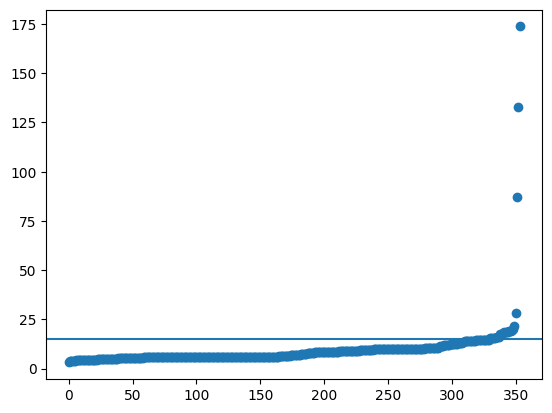

In [63]:
plt.scatter( n.index,n['max_lap_distance_diff'])
plt.axhline(y=15)

In [27]:
for i in cleaned_2022['SESSION_GUID'].drop_duplicates():
    new = cleaned_2022[cleaned_2022['SESSION_GUID']== i]
    for j in new['M_CURRENTLAPNUM'].drop_duplicates():
        new2 = new[new['M_CURRENTLAPNUM']== j].sort_values(by = 'M_LAPDISTANCE_1').reset_index()
        print(i)
        print(j)
        plt.plot(new2['M_LAPDISTANCE_1'], new2['M_SPEED_1'])
        plt.show()

SESSION_IDENTIFIER  FRAME  LAP_NUM  SECTOR  LAP_DISTANCE  \
286           1.004645e+19   1652        1       0      0.580389   
287           1.004645e+19   1653        1       0      4.607213   
288           1.004645e+19   1655        1       0      9.989393   
289           1.004645e+19   1657        1       0     14.036831   
290           1.004645e+19   1659        1       0     18.079540   
...                    ...    ...      ...     ...           ...   
719847        9.988606e+18   3229        2       0    731.051758   
719848        9.988606e+18   3230        2       0    736.019531   
719849        9.988606e+18   3231        2       0    739.764160   
719850        9.988606e+18   3232        2       0    743.519043   
719851        9.988606e+18   3233        2       0    747.284180   

        CURRENT_LAP_TIME_MS  SECTOR_1_TIME_MS  SECTOR_2_TIME_MS  LAP_TIME_MS  \
286                       0             30395             18780        85724   
287                      50             30395             18780        85724   
288                     116             30395             18780        85724   
289                     166             30395             18780        85724   
290                     216             30395             18780        85724   
...                     ...               ...               ...          ...   
719847                11912             32563             18983        91857   
719848                11978             32563             18983        91857   
719849                12028             32563             18983        91857   
719850                12078             32563             18983        91857   
719851                12128             32563             18983        91857   

        SECTOR_3_MS  ...      ROLL   WORLDPOSX   WORLDPOSY  WORLDPOSZ  \
286           36549  ... -0.018526  111.150146  464.910126   2.947756   
287           36549  ... -0.018871  114.049080  462.116333   2.928383   
288           36549  ... -0.018871  117.922577  458.380981   2.890436   
289           36549  ... -0.018806  120.835716  455.572235   2.864503   
290           36549  ... -0.018476  123.746330  452.767700   2.843807   
...             ...  ...       ...         ...         ...        ...   
719847        40311  ...  0.027277  518.917542  -85.700630   3.200703   
719848        40311  ...  0.027323  522.327087  -89.291779   3.199378   
719849        40311  ...  0.025394  524.885742  -92.009560   3.196690   
719850        40311  ...  0.023577  527.432495  -94.751915   3.191392   
719851        40311  ...  0.026454  529.963196  -97.522736   3.187781   

        WORLDFORWARDDIRX  WORLDFORWARDDIRY  WORLDFORWARDDIRZ  WORLDRIGHTDIRX  \
286             -23587.0            -123.0          -22743.0         22738.0   
287             -23579.0            -179.0          -22751.0         22745.0   
288             -23577.0            -202.0          -22753.0         22747.0   
289             -23587.0            -176.0          -22743.0         22737.0   
290             -23602.0            -159.0          -22728.0         22722.0   
...                  ...               ...               ...             ...   
719847          -22560.0             -10.0          -23763.0         23754.0   
719848          -22497.0              15.0          -23823.0         23813.0   
719849          -22352.0             -52.0          -23959.0         23952.0   
719850          -22093.0               0.0          -24198.0         24191.0   
719851          -21829.0             -55.0          -24436.0         24428.0   

        WORLDRIGHTDIRY  WORLDRIGHTDIRZ  
286              607.0        -23585.0  
287              618.0        -23578.0  
288              618.0        -23576.0  
289              616.0        -23586.0  
290              605.0        -23600.0  
...                ...             ...  
719847          -893.0        -22552.0  
719848          -895.0        -22489.0  
719849          -831.0 

In [9]:
cleaned_2024 = filter_by_group_size_2024(data_2024_cols)

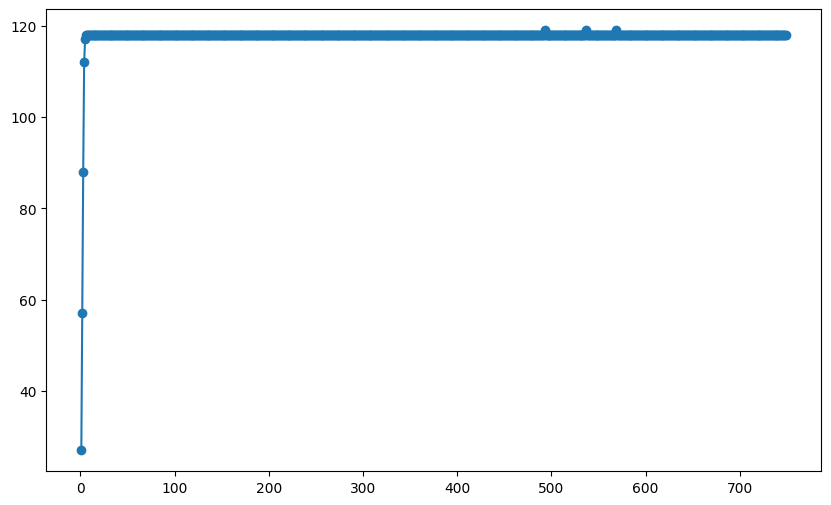

In [49]:
value_counts = data_2024_cols['M_LAPDISTANCE_1'].value_counts().sort_index()

# Plot the counts as a line chart
plt.figure(figsize=(10,6))
plt.plot(value_counts.index, value_counts.values, marker='o')

In [15]:
print(cleaned_2024.columns)

Index(['ID', 'SESSION_GUID', 'M_LAPTIMEINMS', 'M_LAPDISTANCE_1',
       'M_WORLDPOSITIONX_1', 'M_WORLDPOSITIONY_1', 'M_WORLDPOSITIONZ_1',
       'M_WORLDVELOCITYX_1', 'M_WORLDVELOCITYY_1', 'M_WORLDVELOCITYZ_1',
       'M_YAW_1', 'M_SPEED_1', 'M_THROTTLE_1', 'M_STEER_1', 'M_BRAKE_1',
       'M_CURRENTLAPNUM'],
      dtype='object')


1BF21BECE1C29DBFE0631718000AACA5
1


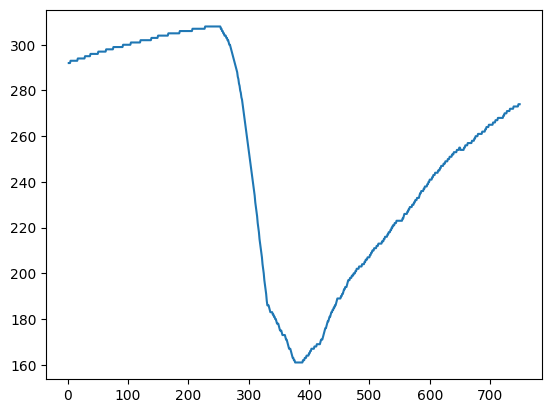

1BF21BECE1C29DBFE0631718000AACA5
2


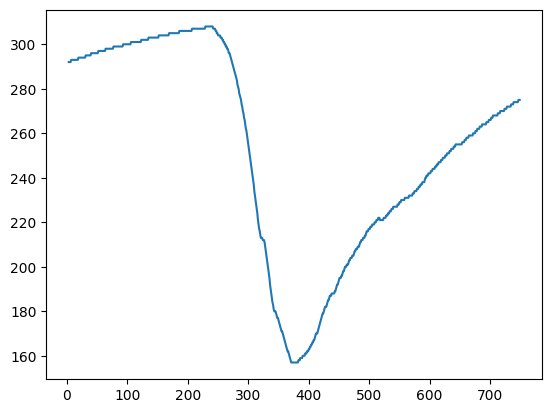

211C82236DA74918E0631218000A8592
1


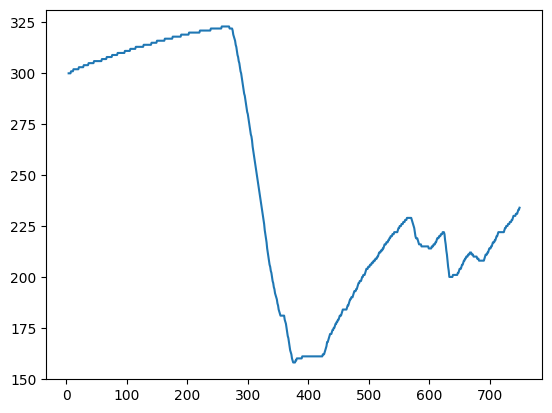

211C82236DA74918E0631218000A8592
3


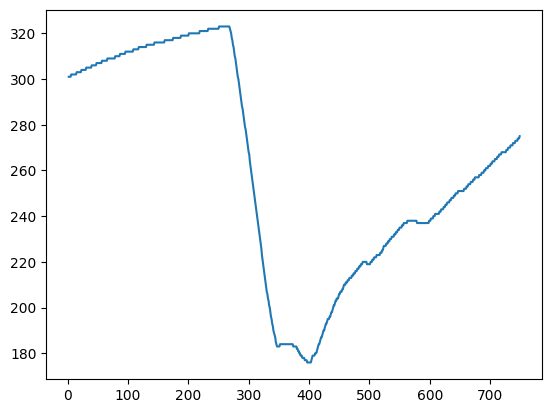

211C82236DA74918E0631218000A8592
2


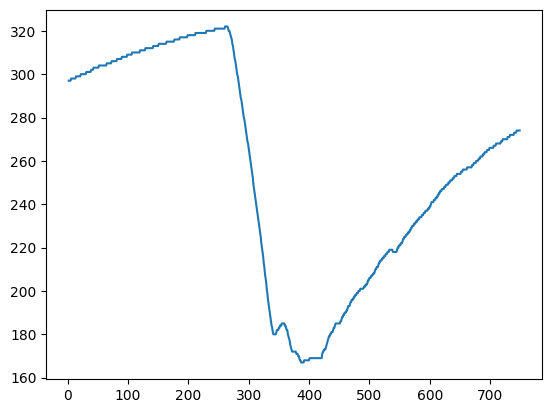

211C98F7A4BA963EE0631218000AB662
1


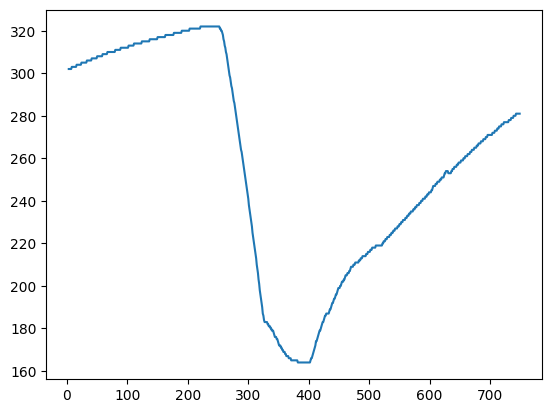

211C98F7A4BA963EE0631218000AB662
2


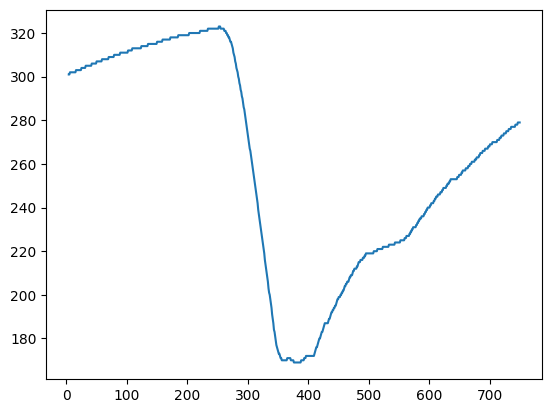

211C98F7A4BA963EE0631218000AB662
3


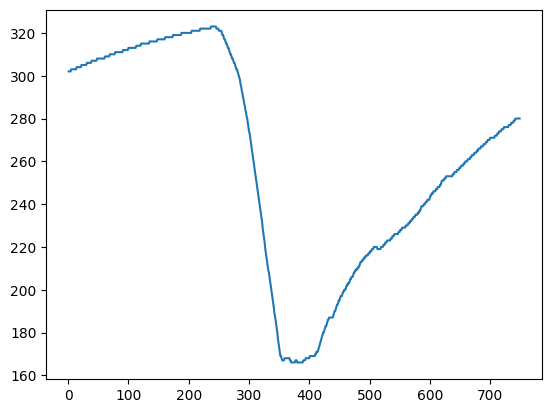

21210D2279275E99E0631218000ADC94
1


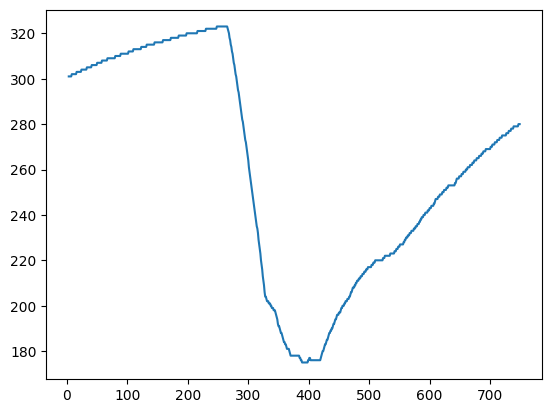

21210D2279275E99E0631218000ADC94
2


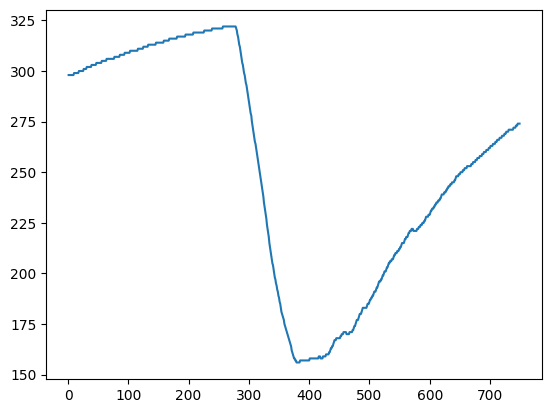

21210D2279275E99E0631218000ADC94
3


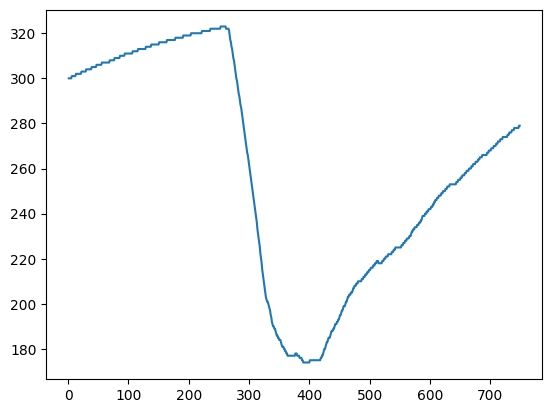

211C109D003DE77BE0631218000A20E7
1


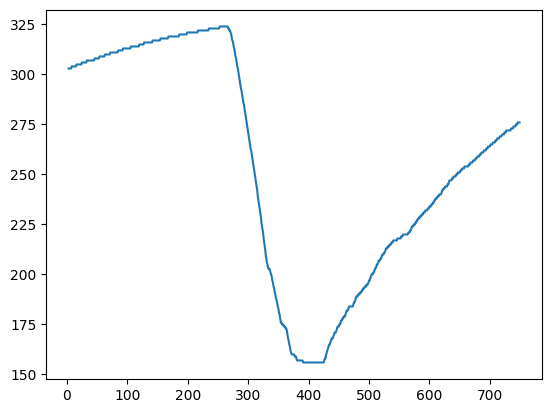

211C109D003DE77BE0631218000A20E7
2


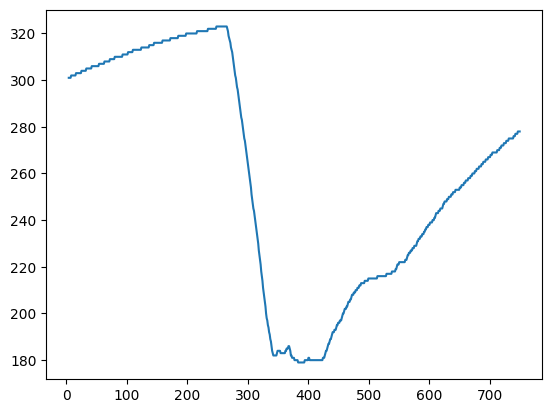

211D57789BB3E672E0631218000A3153
2


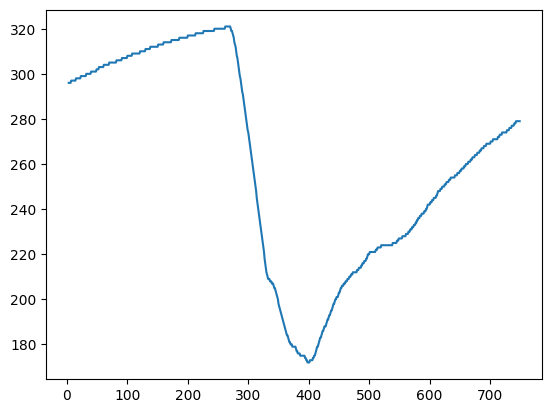

211D57789BB3E672E0631218000A3153
4


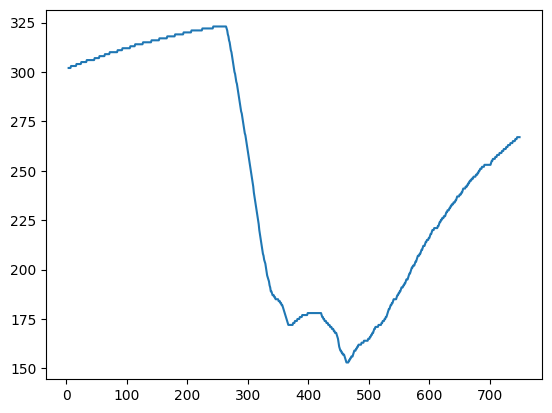

211D57789BB3E672E0631218000A3153
6


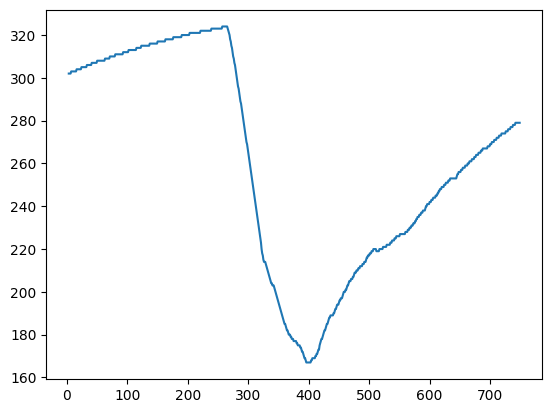

211D57789BB3E672E0631218000A3153
3


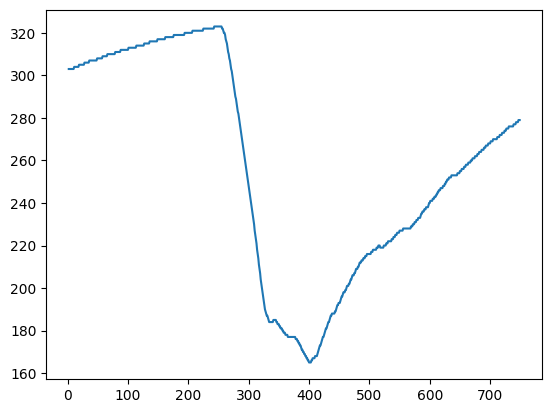

211D57789BB3E672E0631218000A3153
1


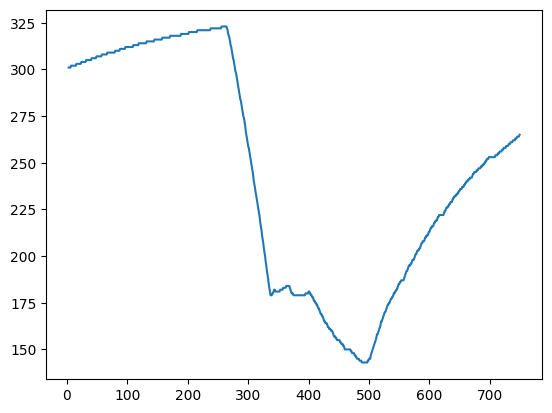

211D57789BB3E672E0631218000A3153
5


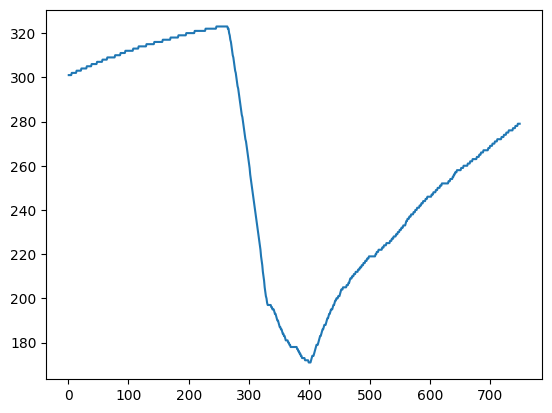

211C1464D105F8D6E0631218000A785F
2


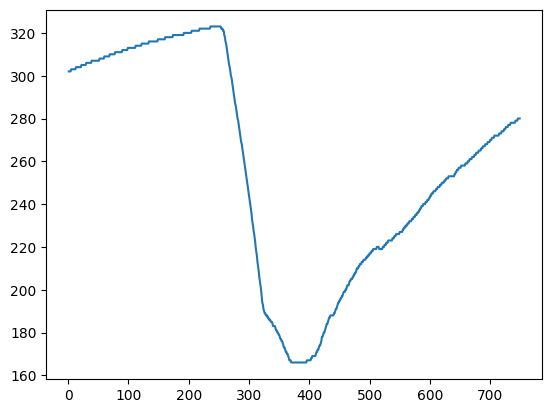

211C1464D105F8D6E0631218000A785F
1


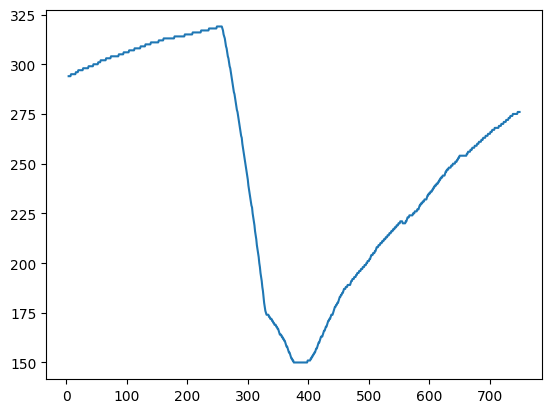

2123408F2C4B88E5E0631218000A651D
1


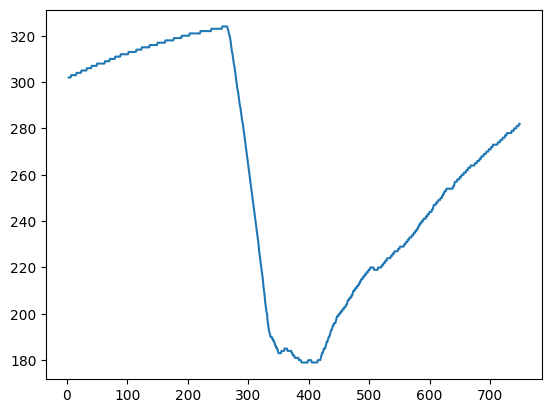

2123408F2C4B88E5E0631218000A651D
4


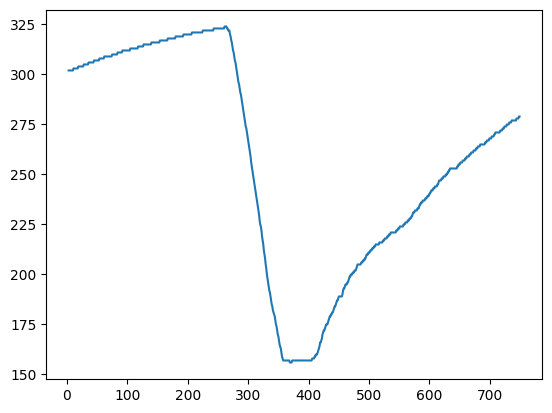

2123408F2C4B88E5E0631218000A651D
2


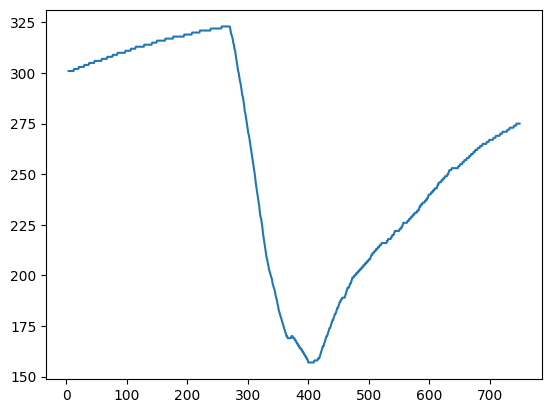

2123408F2C4B88E5E0631218000A651D
3


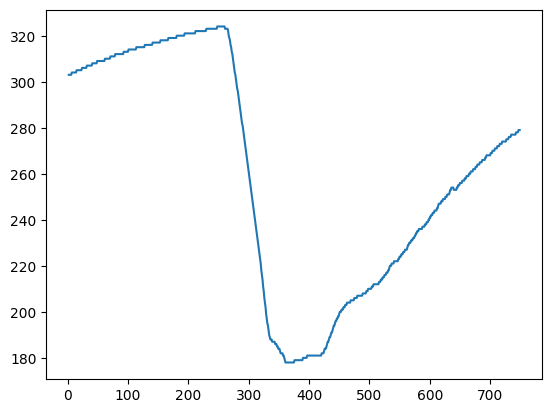

21198A4F132E1402E0631218000AC59A
1


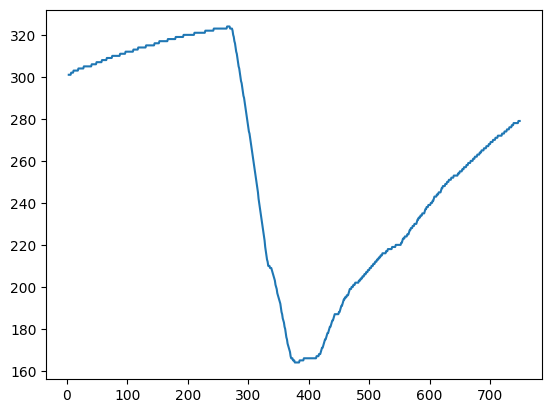

21198A4F132E1402E0631218000AC59A
2


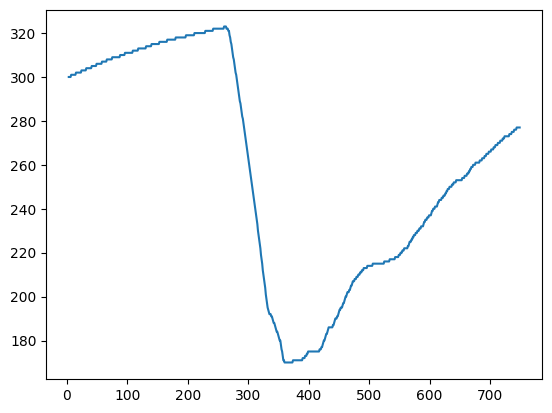

211F74981597D869E0631218000A3CD3
1


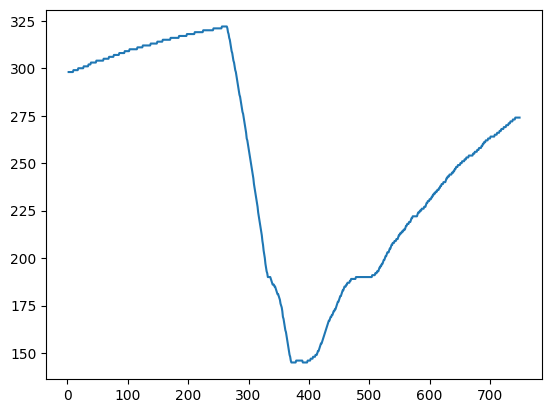

211F74981597D869E0631218000A3CD3
2


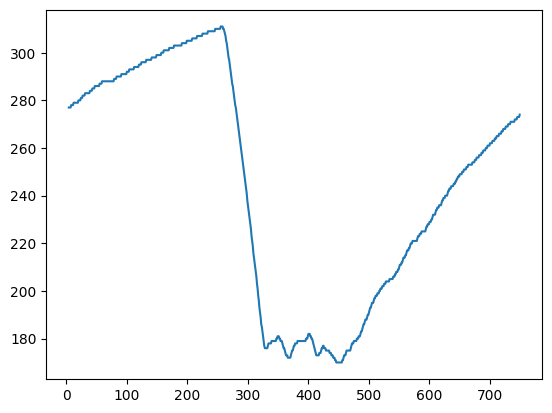

211B5DC56375BBD0E0631218000AAA6D
2


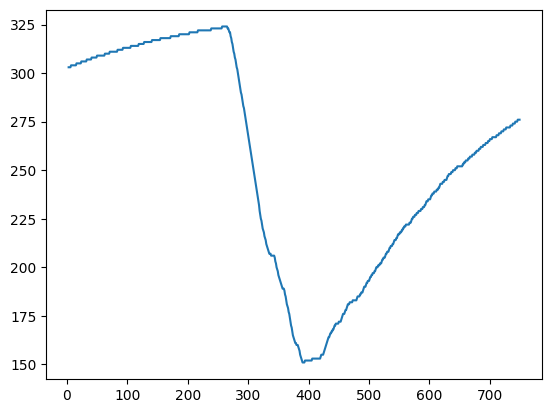

211B5DC56375BBD0E0631218000AAA6D
1


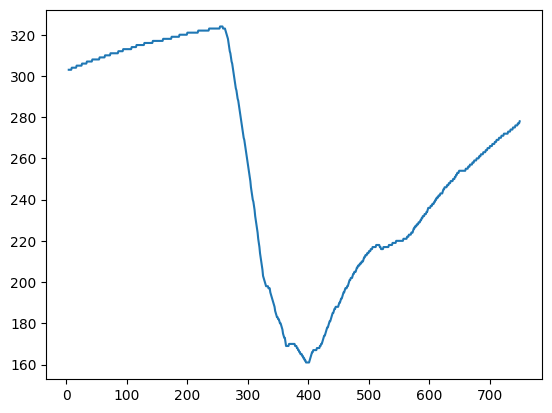

211D33844084CBB8E0631218000A5F0C
1


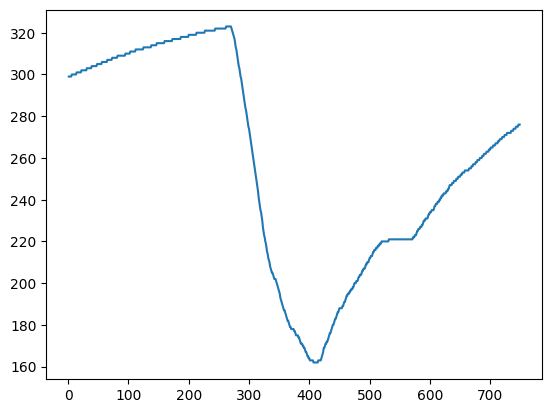

211D33844084CBB8E0631218000A5F0C
3


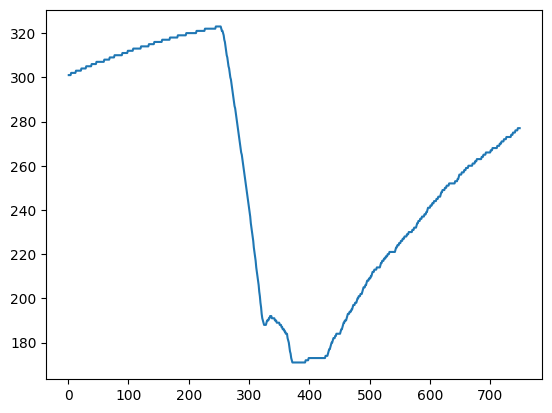

211D33844084CBB8E0631218000A5F0C
2


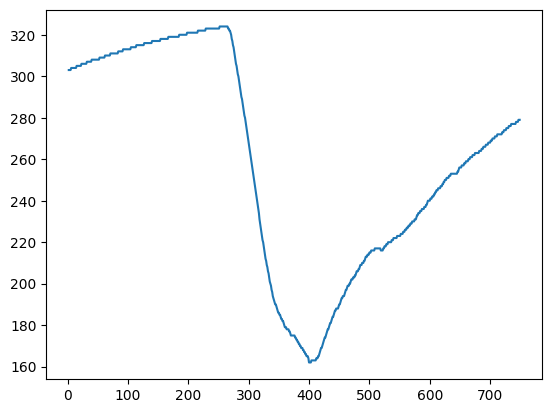

211F7396F36ABA53E0631218000A9E99
3


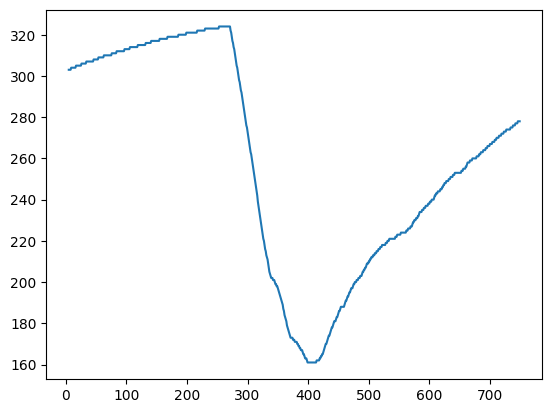

211F7396F36ABA53E0631218000A9E99
2


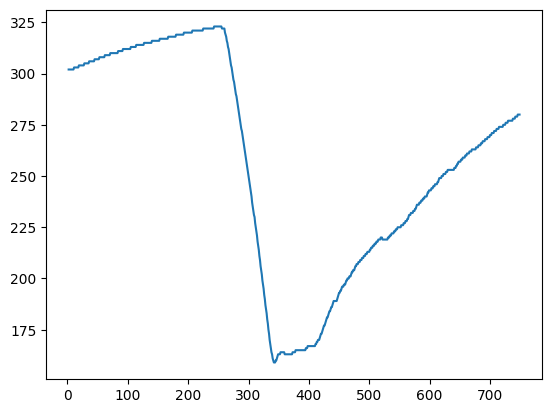

211F7396F36ABA53E0631218000A9E99
1


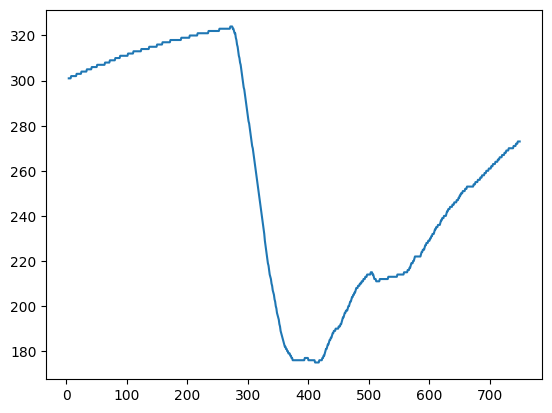

1BFBC46846891C71E0631718000A65FB
1


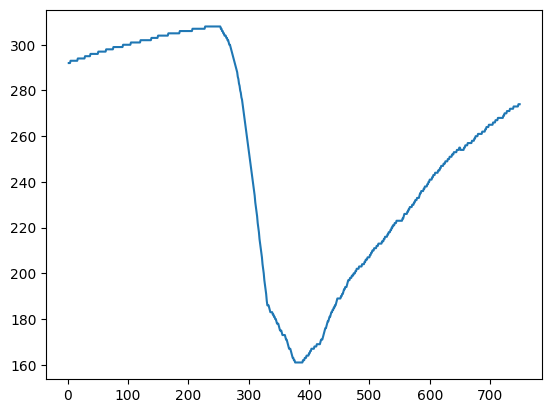

211D56EB09F3D3F8E0631218000A5C63
3


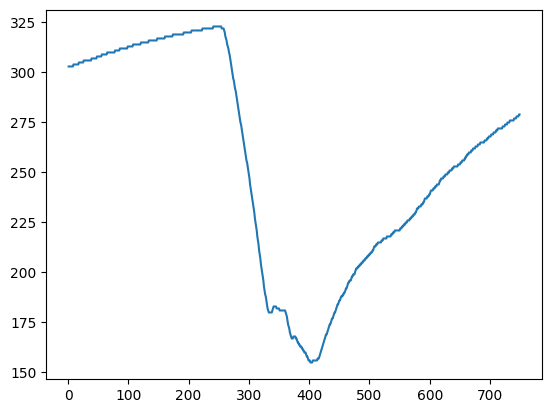

211D56EB09F3D3F8E0631218000A5C63
1


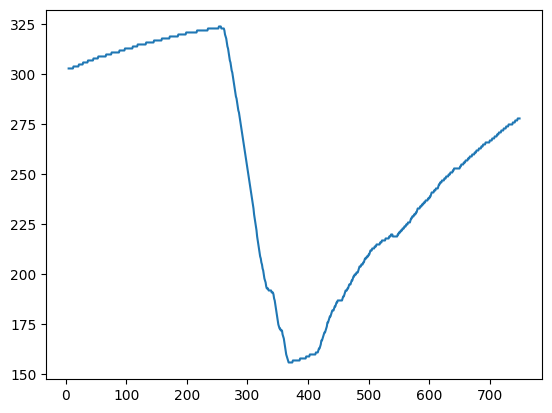

211D56EB09F3D3F8E0631218000A5C63
2


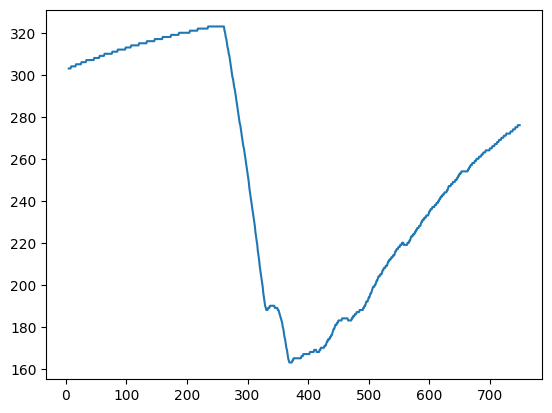

211D56EB09F3D3F8E0631218000A5C63
4


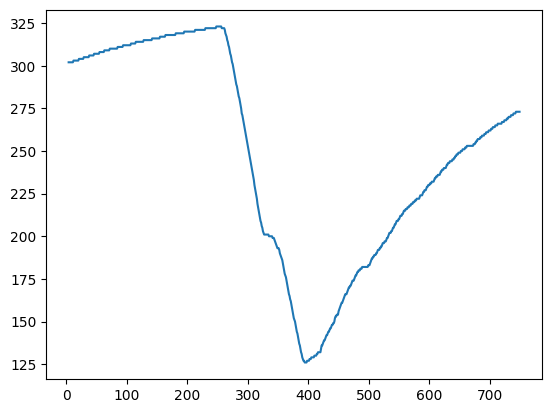

2129C22A37945EDFE0631218000A629C
1


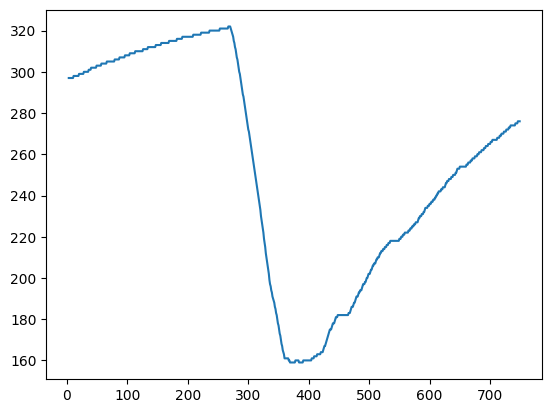

2129C22A37945EDFE0631218000A629C
2


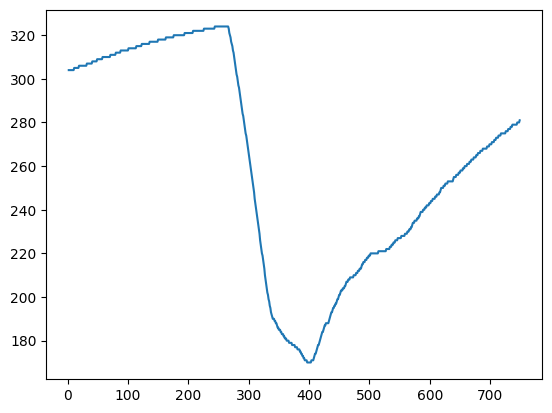

213129C74DB3C0A4E0631218000AE157
1


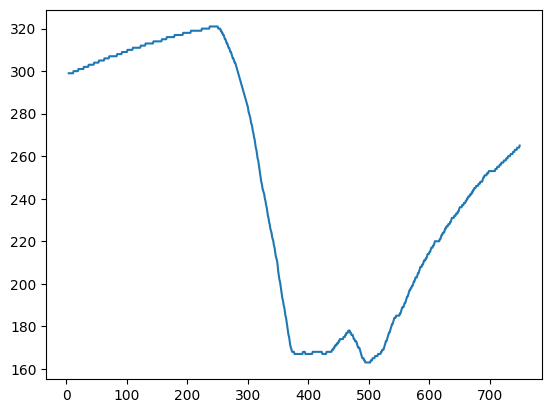

213129C74DB3C0A4E0631218000AE157
2


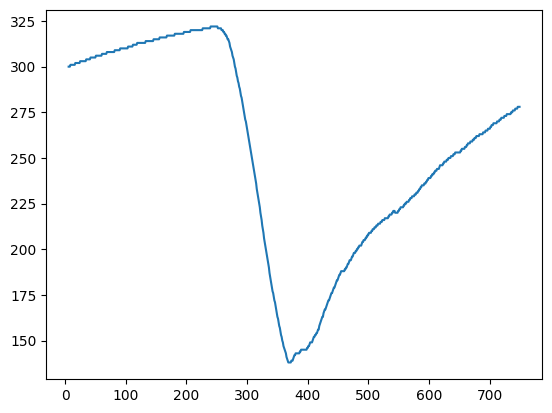

212340C6225C89A4E0631218000A5657
2


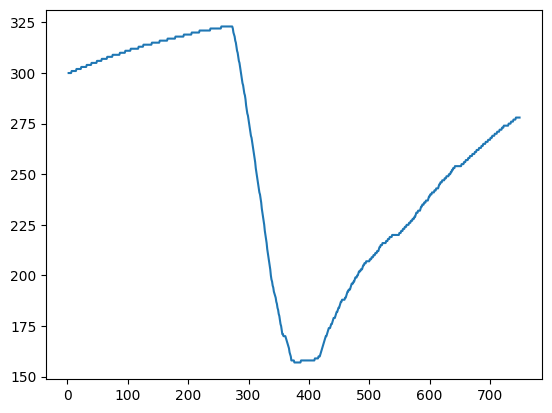

212340C6225C89A4E0631218000A5657
1


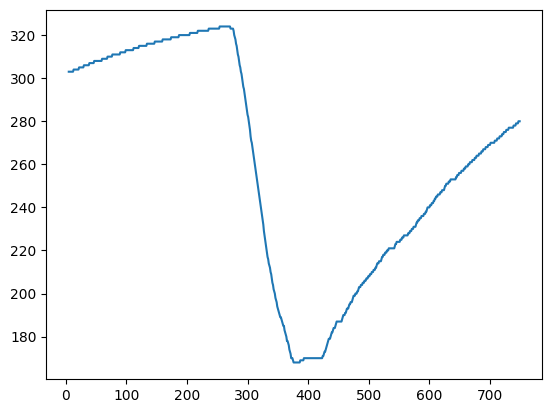

212340C6225C89A4E0631218000A5657
3


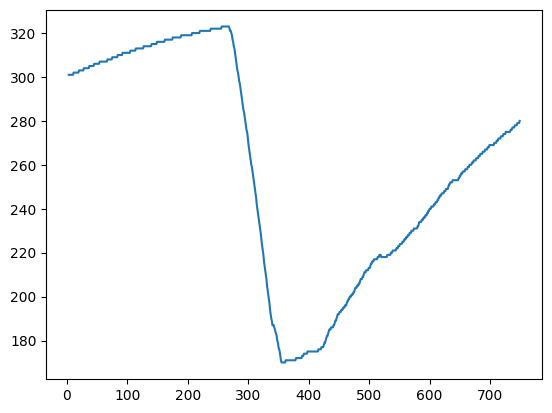

212340C6225C89A4E0631218000A5657
4


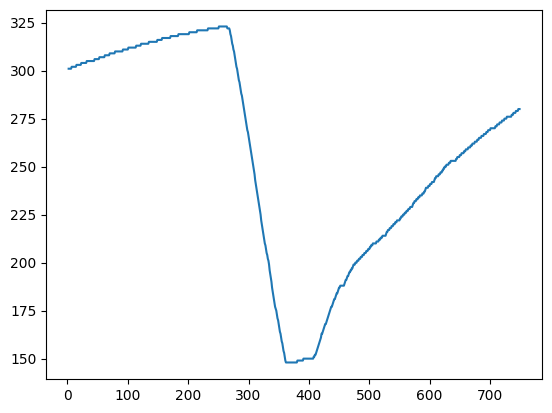

21210BD3721D40EBE0631218000A96F7
1


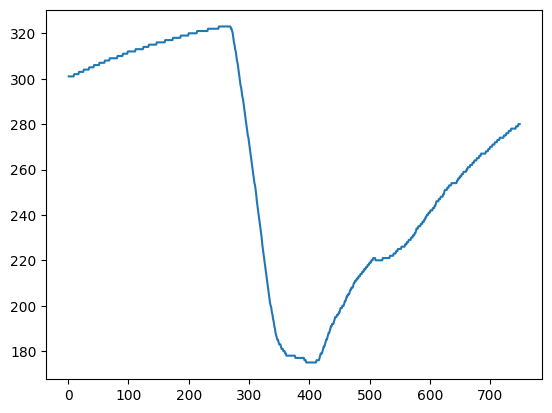

21210BD3721D40EBE0631218000A96F7
3


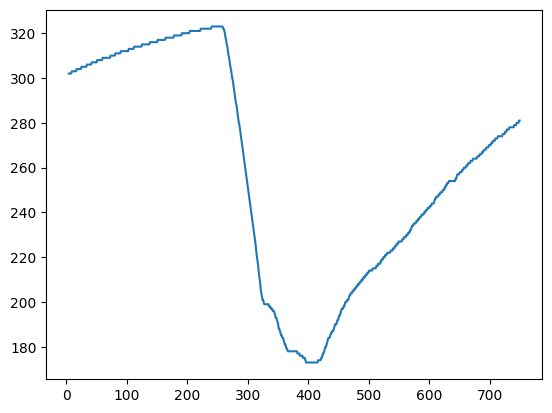

21210BD3721D40EBE0631218000A96F7
2


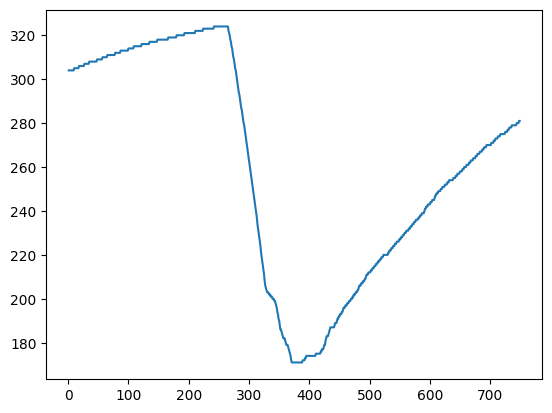

212F91F503F15DA4E0631218000AB2B2
2


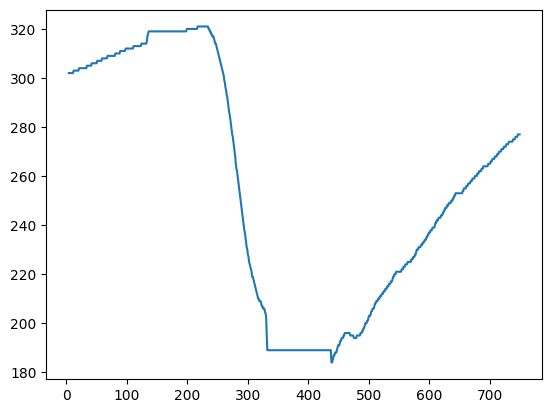

212F91F503F15DA4E0631218000AB2B2
1


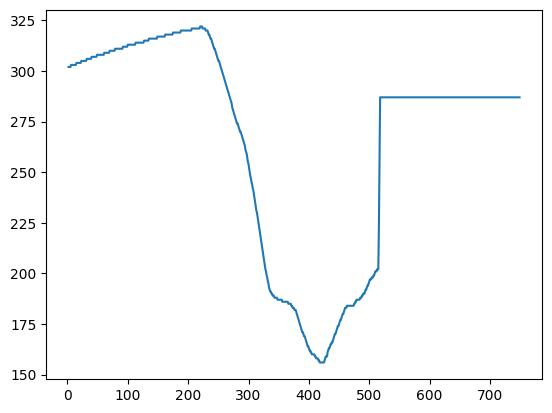

211F1AF19C8D82E9E0631218000A3A5B
1


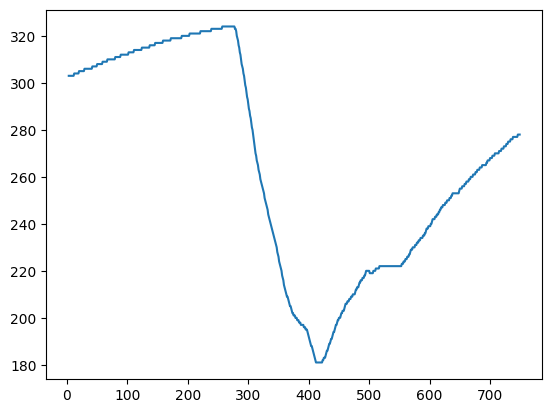

212FF3A21D70958FE0631218000AF6A9
2


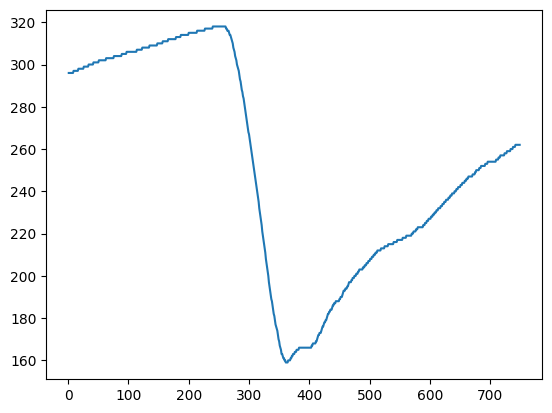

212FF3A21D70958FE0631218000AF6A9
1


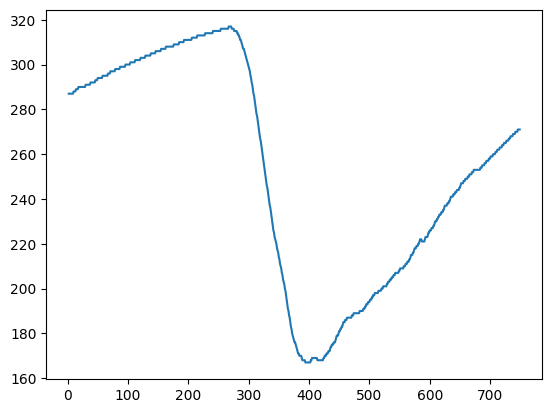

212FF343F6B09081E0631218000A6DFA
2


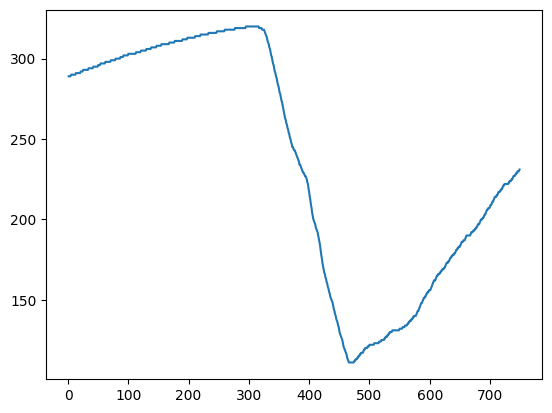

212FF343F6B09081E0631218000A6DFA
1


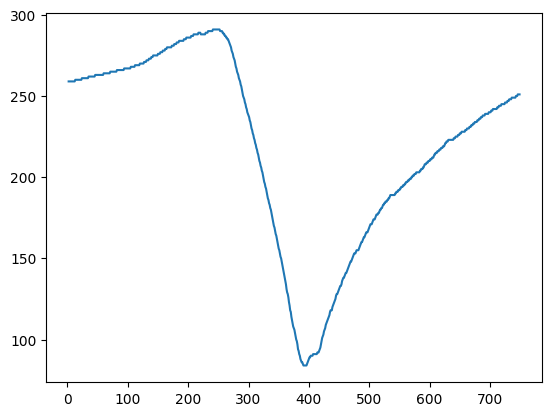

21210BE84D65411EE0631218000A7965
3


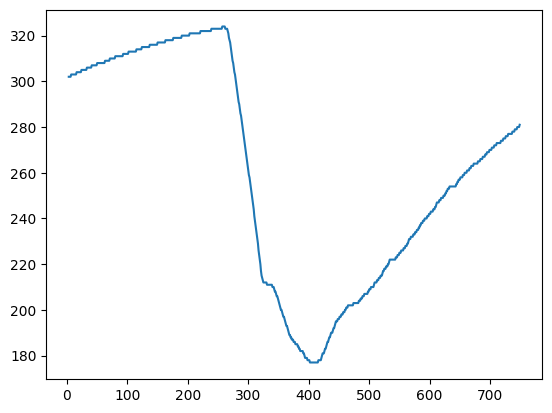

21210BE84D65411EE0631218000A7965
2


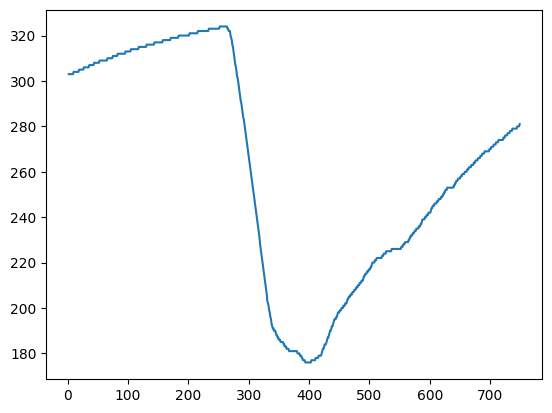

21210BE84D65411EE0631218000A7965
1


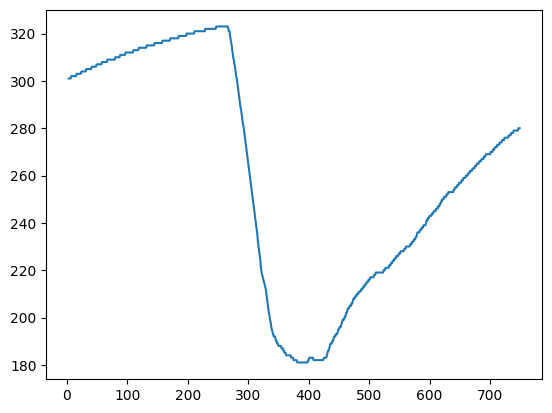

212FF368108B9538E0631218000AB032
1


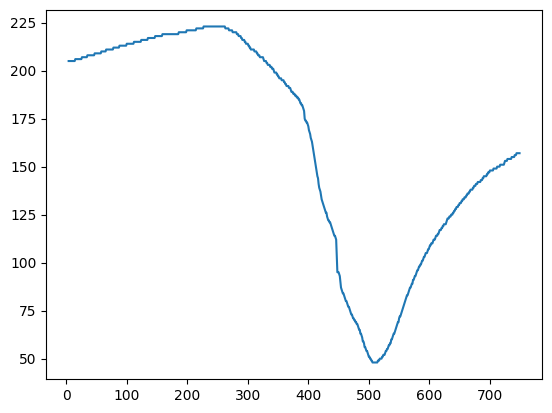

212FF368108B9538E0631218000AB032
2


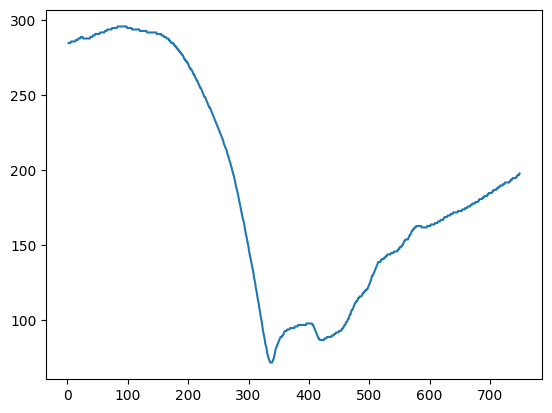

212FF323A3DE9040E0631218000A4F6E
2


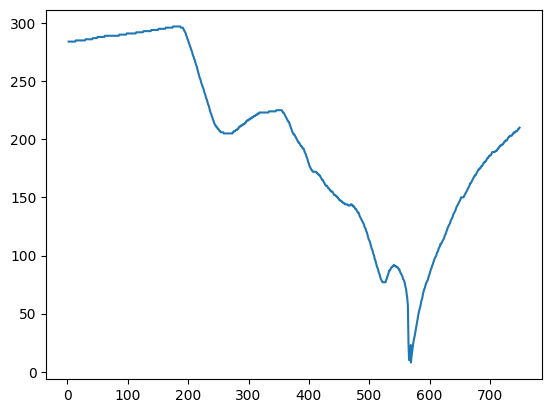

212FF323A3DE9040E0631218000A4F6E
1


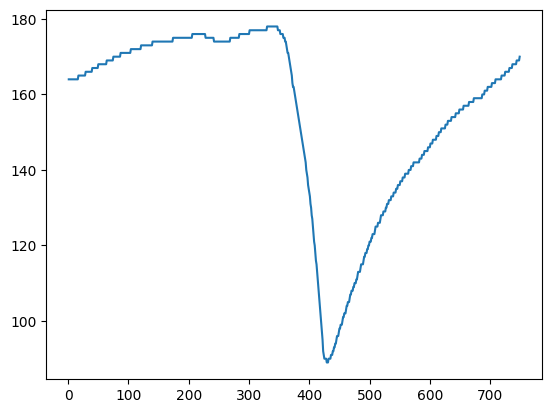

212FF35A59E590D4E0631218000ACD59
1


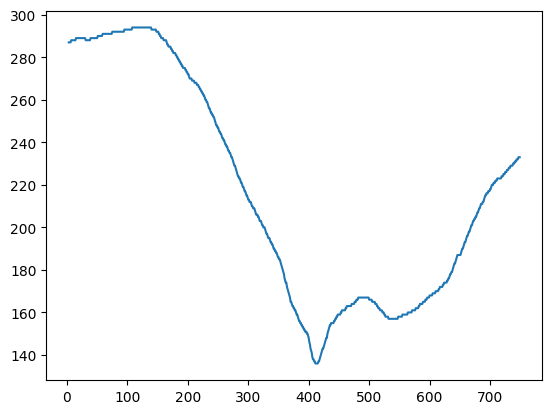

212FF35A59E590D4E0631218000ACD59
2


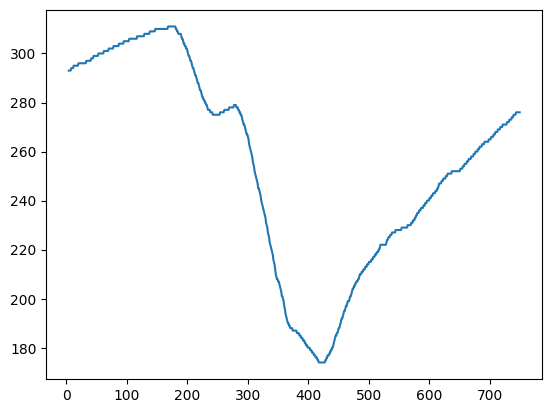

212F91F4D2505DA4E0631218000AB2B2
2


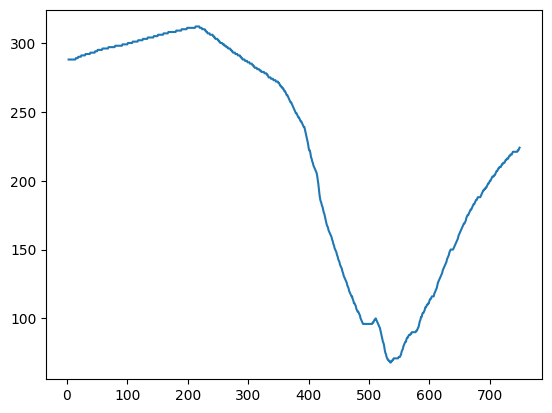

21210D2271775E99E0631218000ADC94
2


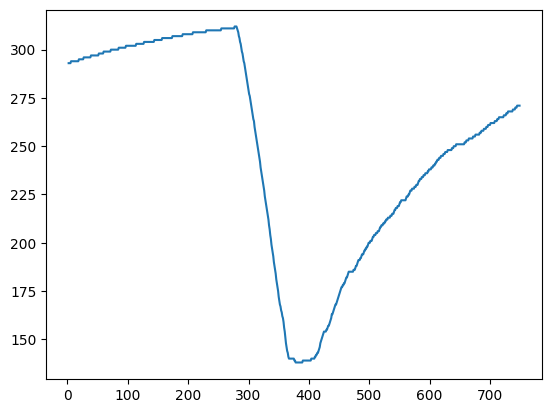

21210D2271775E99E0631218000ADC94
1


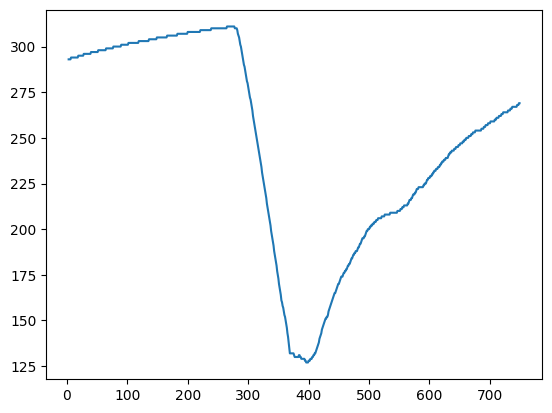

212FF32399EC9040E0631218000A4F6E
2


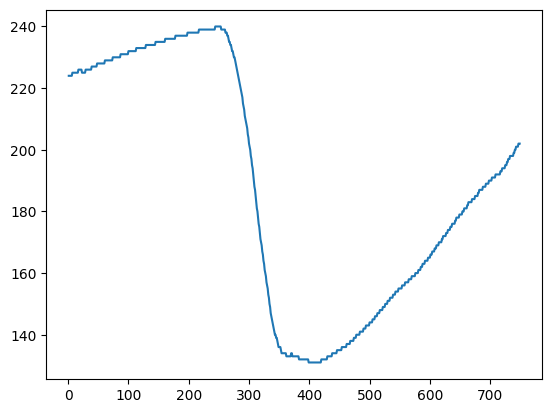

212FF32399EC9040E0631218000A4F6E
1


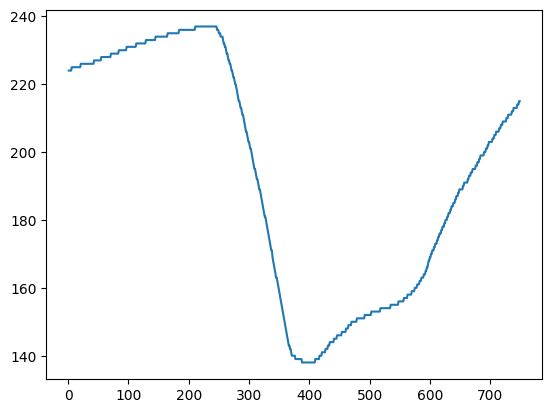

212FF34418209081E0631218000A6DFA
2


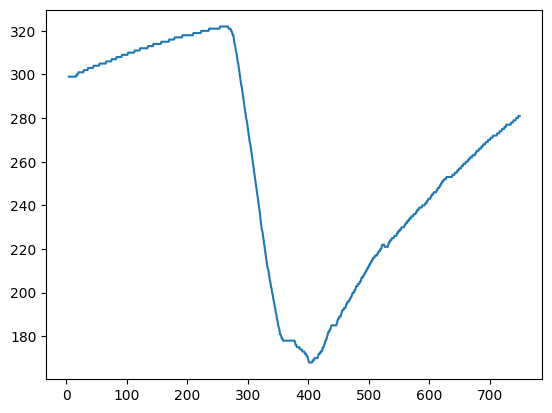

212FF34418209081E0631218000A6DFA
1


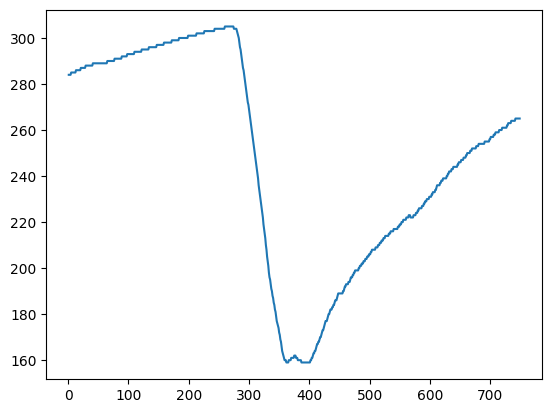

212EDE1C166A7E72E0631218000AE3B4
1


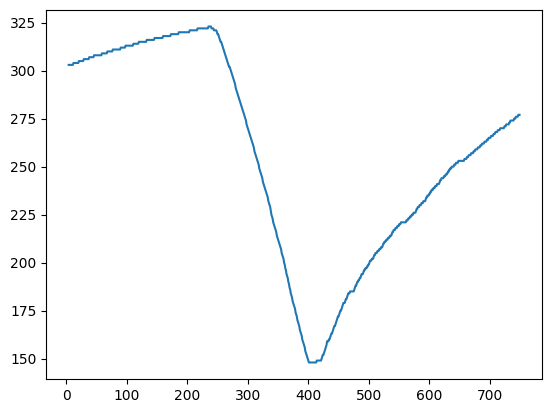

212FF388F2379563E0631218000A1B96
1


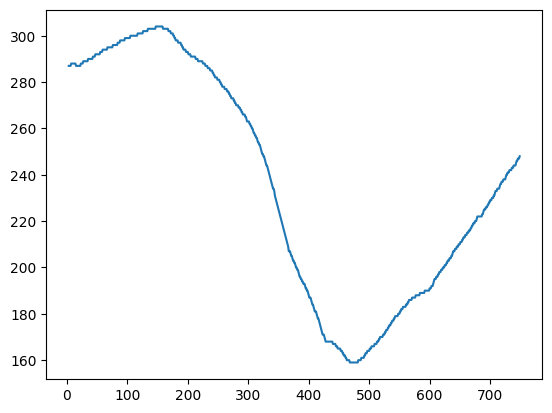

212FF388F2379563E0631218000A1B96
2


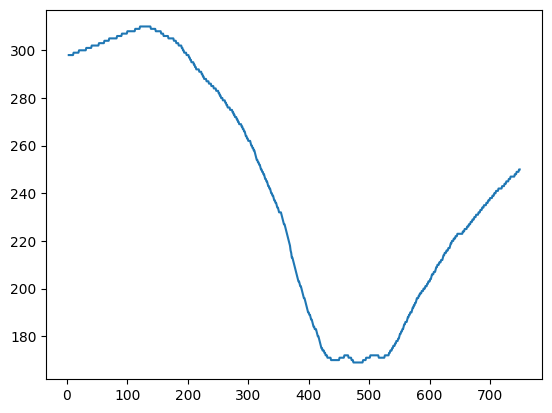

2130E60F0974B928E0631218000A99A7
2


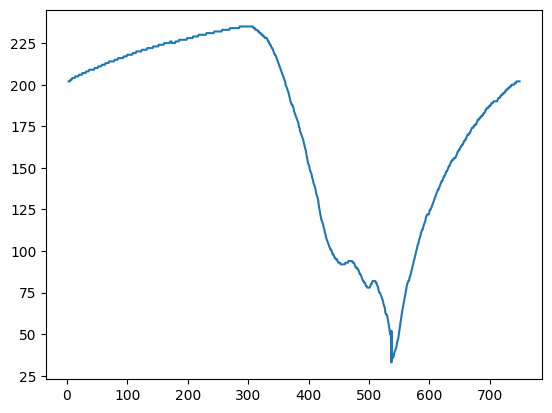

2130E60F0974B928E0631218000A99A7
1


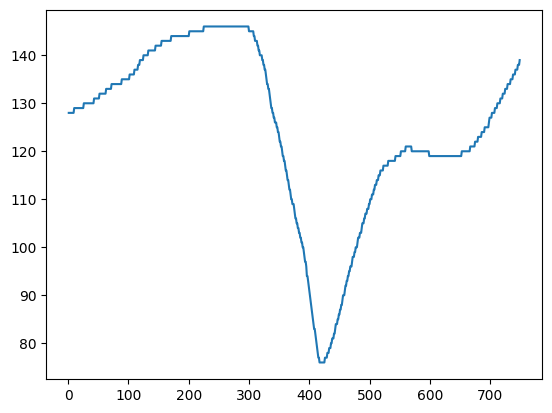

2130CCF0B60638B3E0631218000AADC9
2


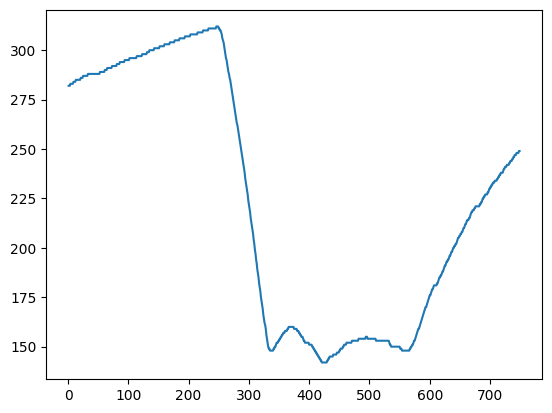

2130CCF0B60638B3E0631218000AADC9
1


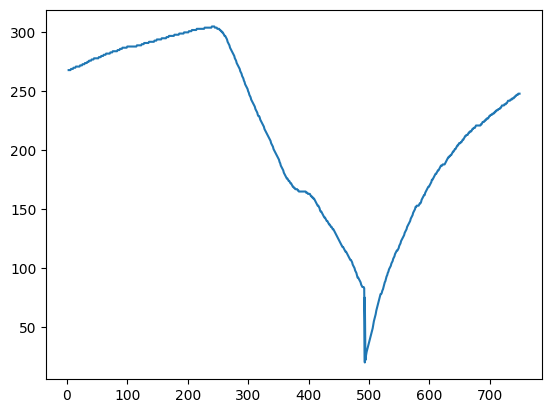

2131C72B6DF61371E0631218000ACBAE
1


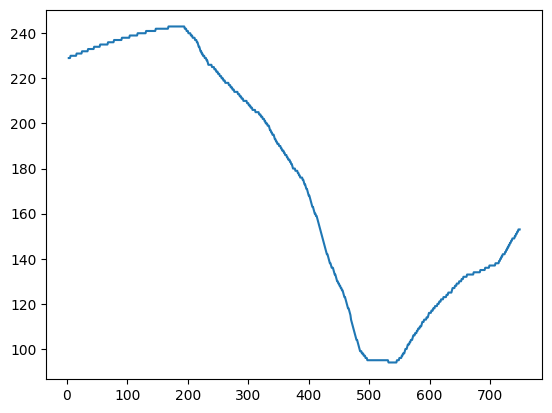

2131C72B6DF61371E0631218000ACBAE
2


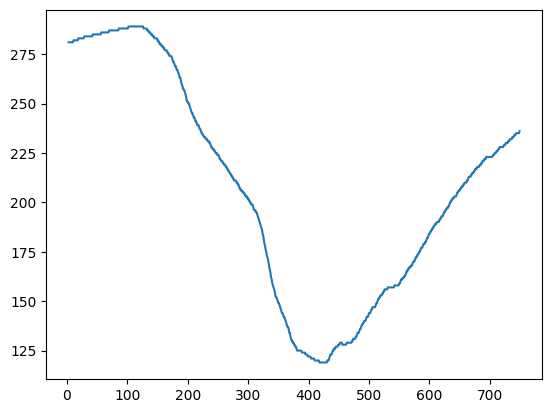

21316631306D4FCCE0631218000A64C5
1


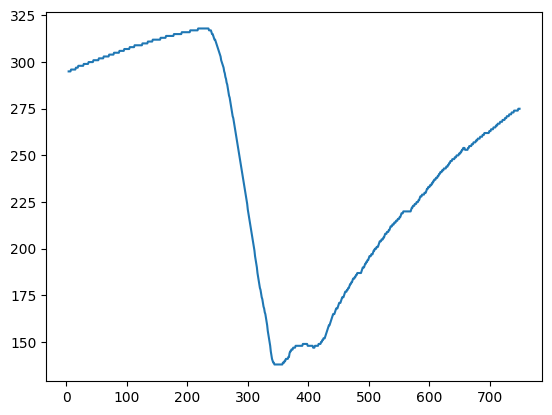

21316631306D4FCCE0631218000A64C5
2


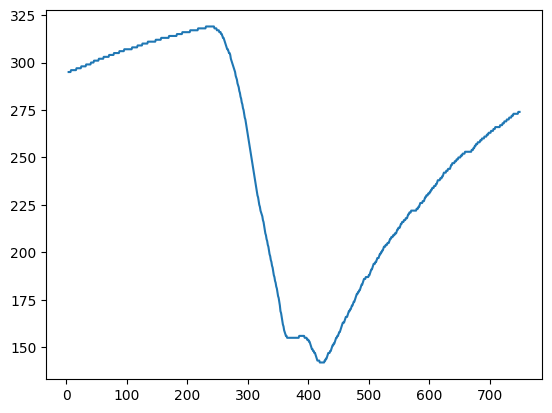

212FF31CC5448FBDE0631218000A73E8
1


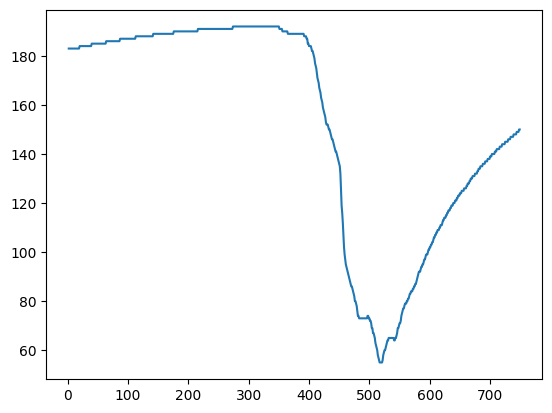

212FF31CC5448FBDE0631218000A73E8
2


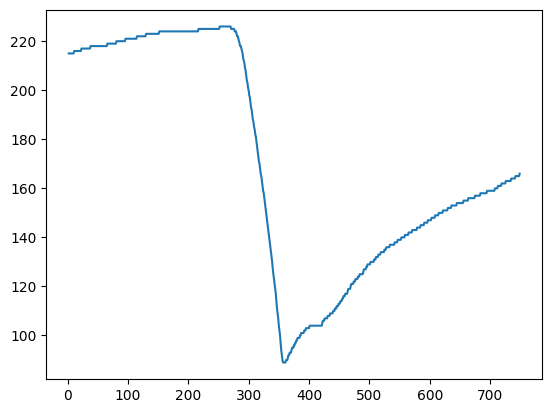

213129C724F1C0A4E0631218000AE157
2


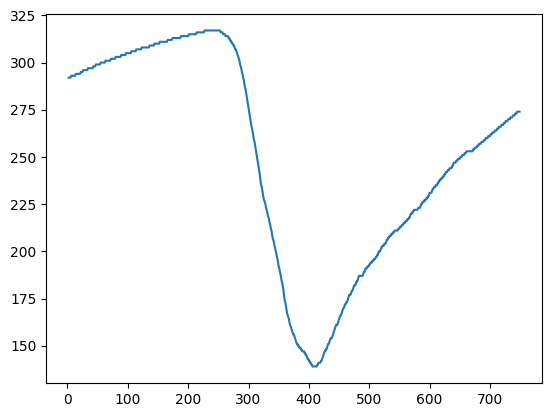

213129C724F1C0A4E0631218000AE157
1


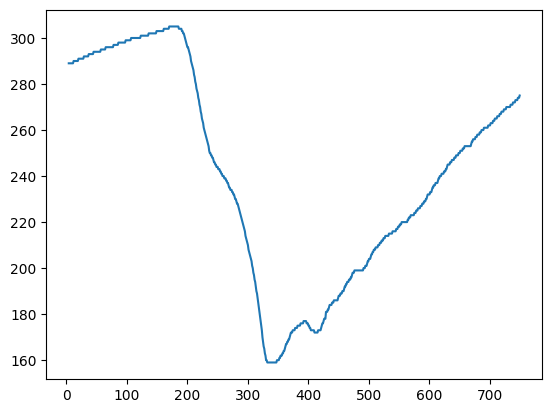

212FF367F7B19538E0631218000AB032
2


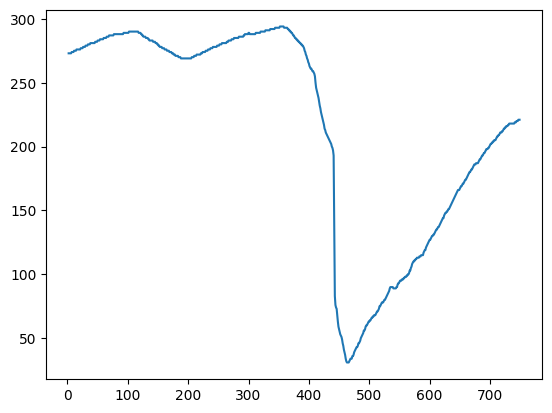

212FF367F7B19538E0631218000AB032
1


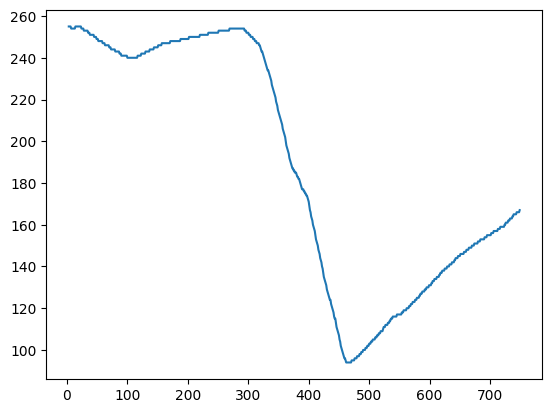

212FF323C1479040E0631218000A4F6E
2


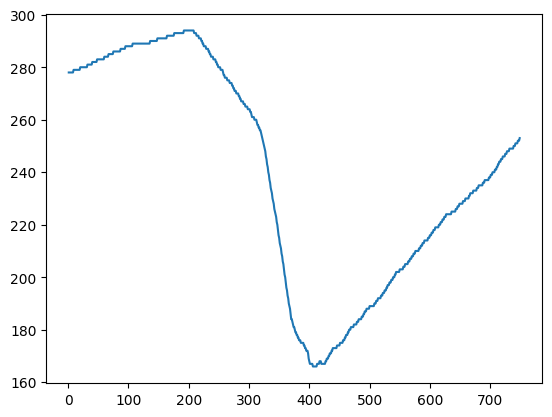

212FF323C1479040E0631218000A4F6E
1


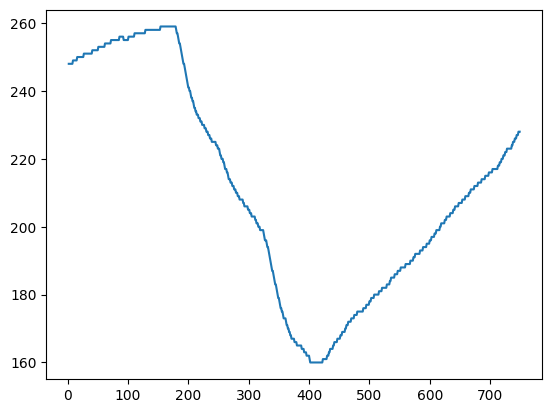

212FF3244D7E9040E0631218000A4F6E
2


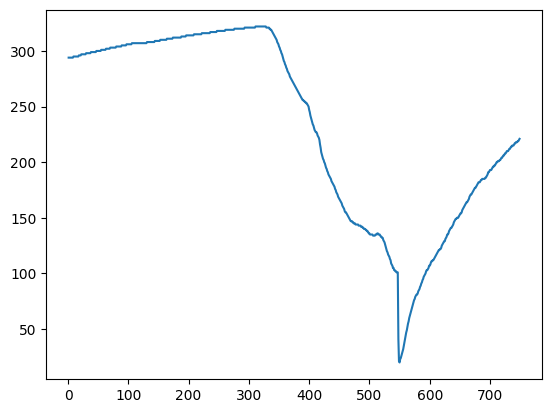

212FF3244D7E9040E0631218000A4F6E
1


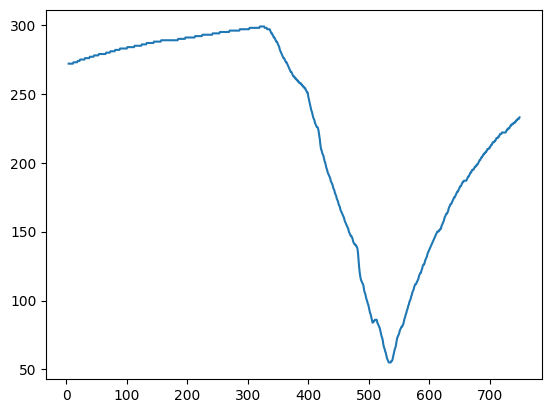

211E9E97957129FFE0631218000A92DC
1


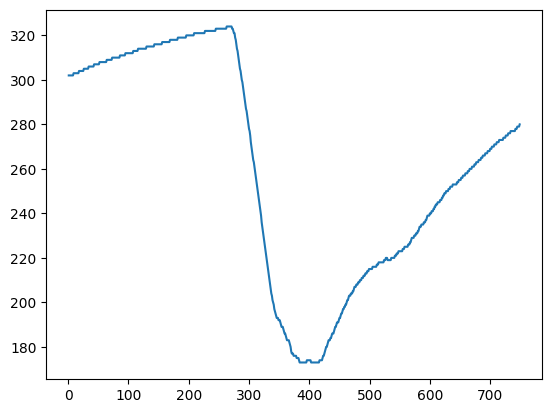

211E9E97957129FFE0631218000A92DC
2


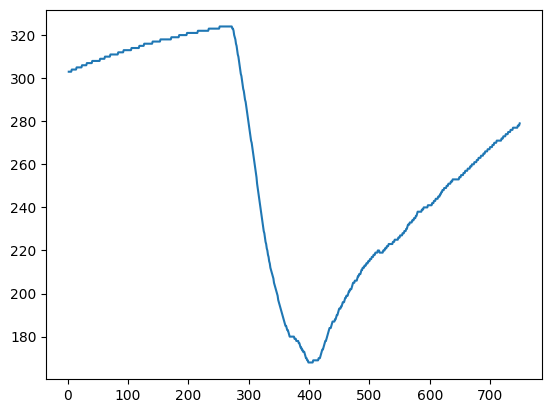

212FF3730FCA9553E0631218000A0A03
2


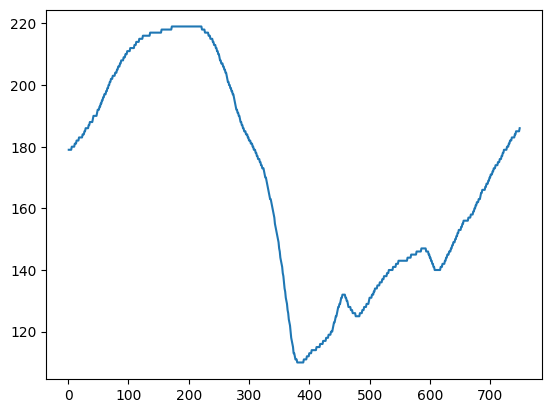

212FF3730FCA9553E0631218000A0A03
1


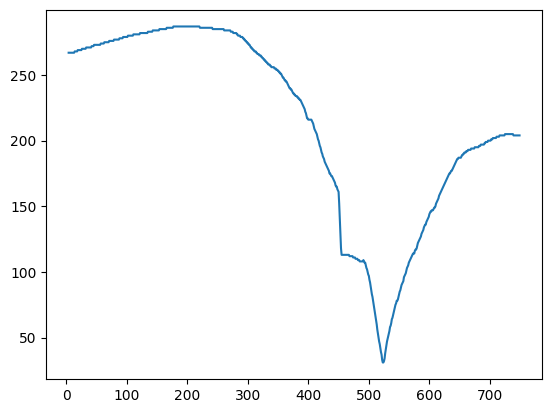

2130CCF0972C38B3E0631218000AADC9
2


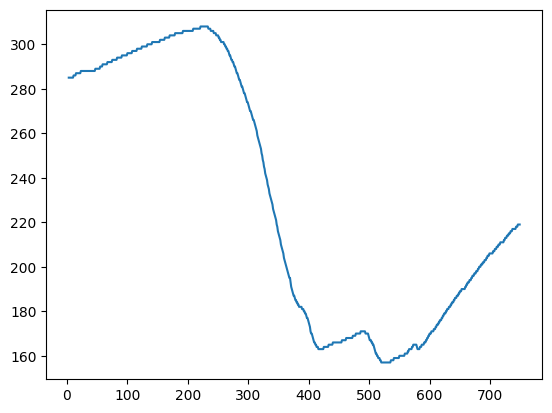

2130CCF0972C38B3E0631218000AADC9
1


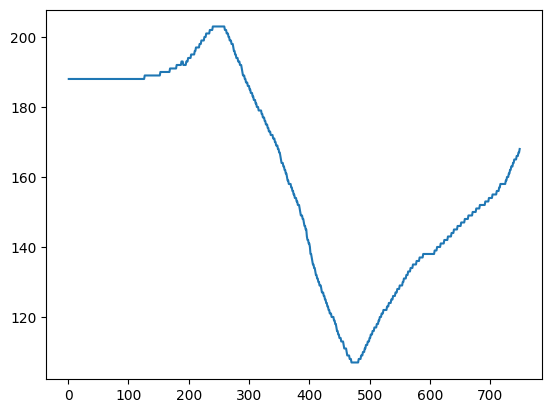

212FF3442D9D9081E0631218000A6DFA
1


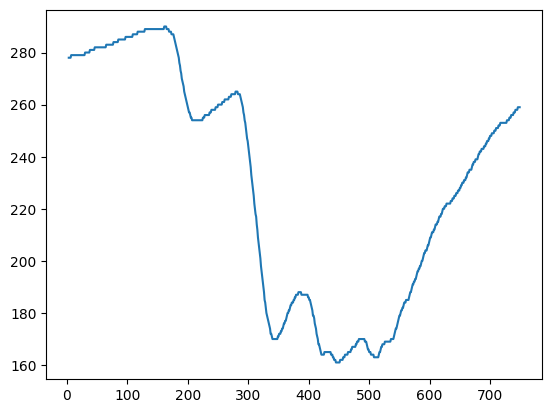

212FF3442D9D9081E0631218000A6DFA
2


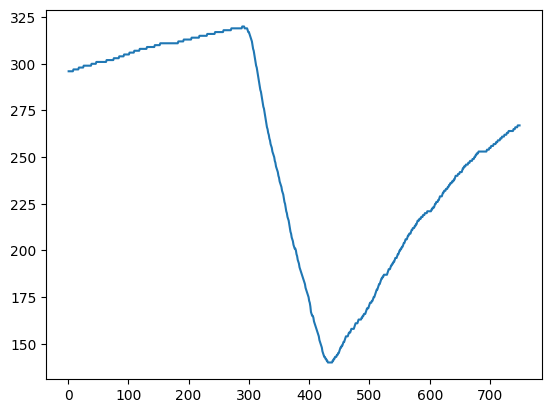

212FF31CD7D48FBDE0631218000A73E8
2


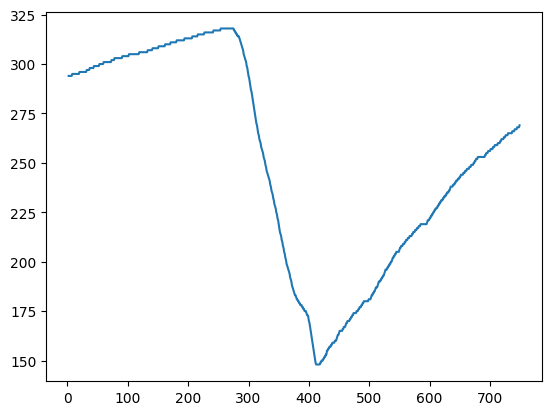

212FF31CD7D48FBDE0631218000A73E8
1


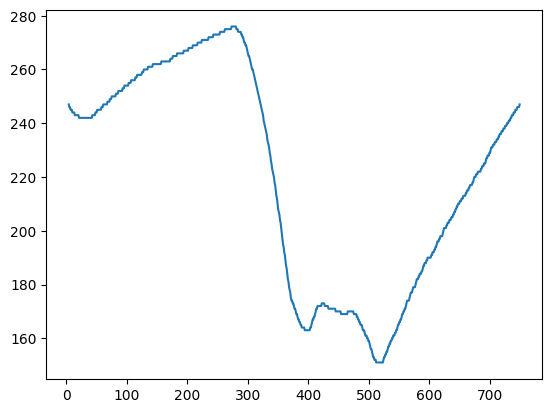

212F4920E1E312BFE0631218000A84D4
1


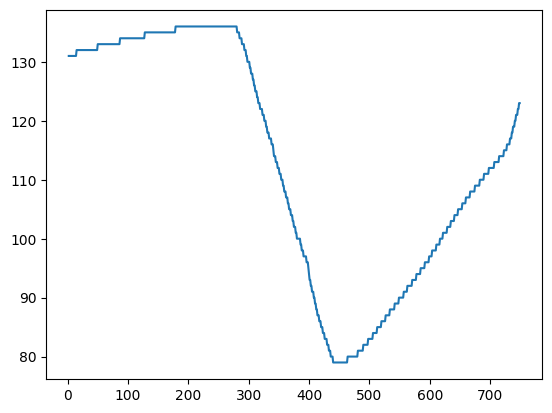

212F4920E1E312BFE0631218000A84D4
2


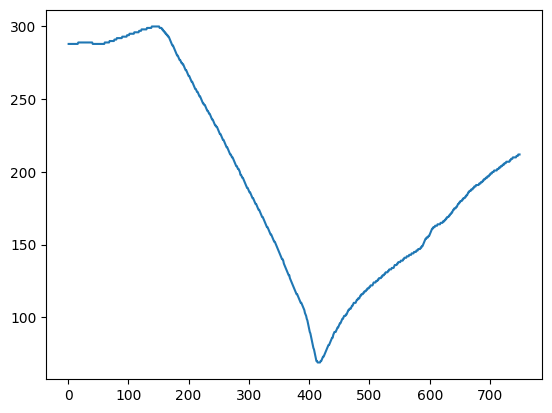

212FF31C9AF38FBDE0631218000A73E8
2


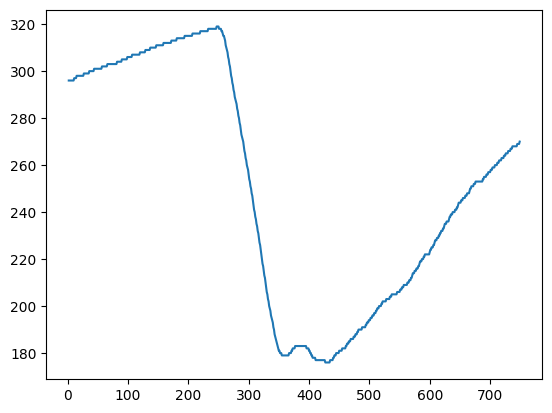

212FF31C9AF38FBDE0631218000A73E8
1


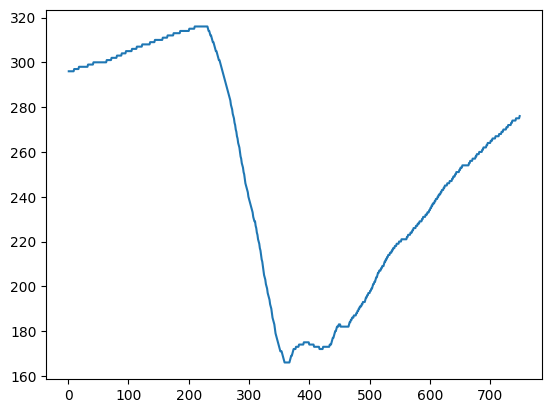

2130E60EF323B928E0631218000A99A7
1


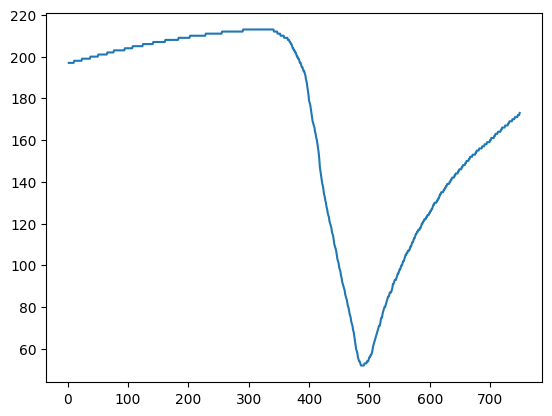

2130E60EF323B928E0631218000A99A7
2


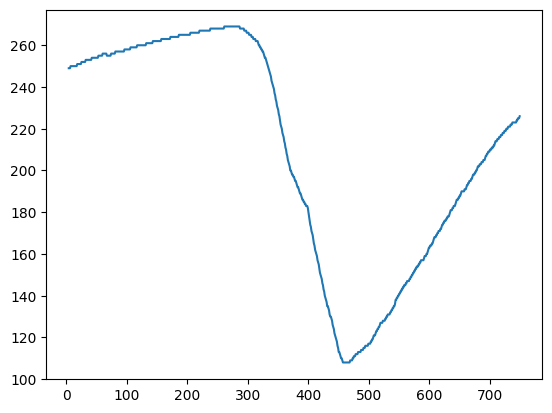

2130E60F4A3FB928E0631218000A99A7
2


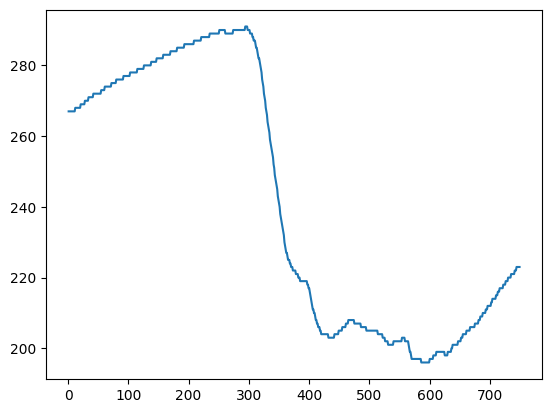

2130E60F4A3FB928E0631218000A99A7
1


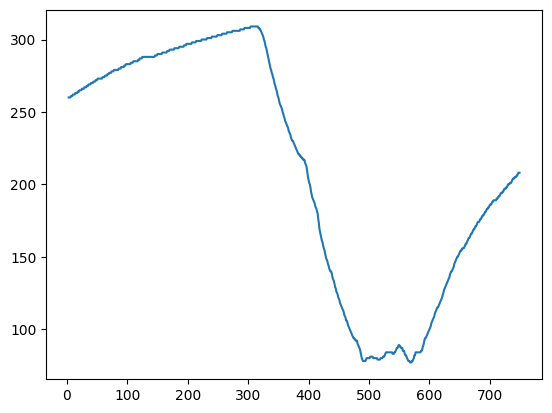

2130E60F68DFB928E0631218000A99A7
1


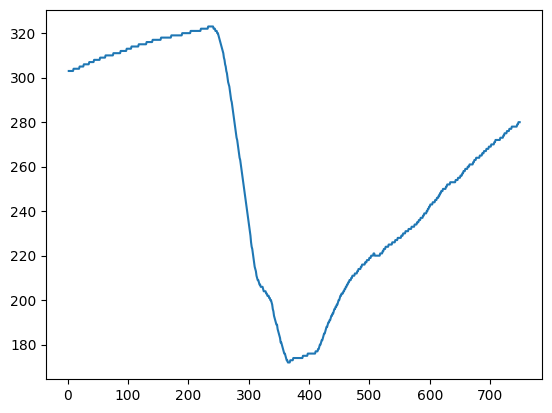

2130E60F68DFB928E0631218000A99A7
2


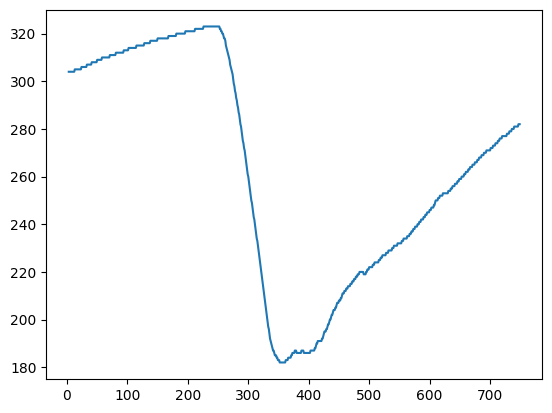

In [17]:
for i in cleaned_2024['SESSION_GUID'].drop_duplicates():
    new = cleaned_2024[cleaned_2024['SESSION_GUID']== i]
    for j in new['M_CURRENTLAPNUM'].drop_duplicates():
        new2 = new[new['M_CURRENTLAPNUM']== j].sort_values(by = 'M_LAPDISTANCE_1').reset_index()
        print(i)
        print(j)
        plt.plot(new2['M_LAPDISTANCE_1'], new2['M_SPEED_1'])
        plt.show()


In [87]:
kk = (cleaned_2024[(cleaned_2024['SESSION_GUID'] == '1BF21BECE1C29DBFE0631718000AACA5') & (cleaned_2024['M_CURRENTLAPNUM'] == 1)]).sort_values(by = 'M_LAPDISTANCE_1').reset_index()
kk2 = (cleaned_2024[(cleaned_2024['SESSION_GUID'] == '211C82236DA74918E0631218000A8592') & (cleaned_2024['M_CURRENTLAPNUM'] == 1)]).sort_values(by = 'M_LAPDISTANCE_1')


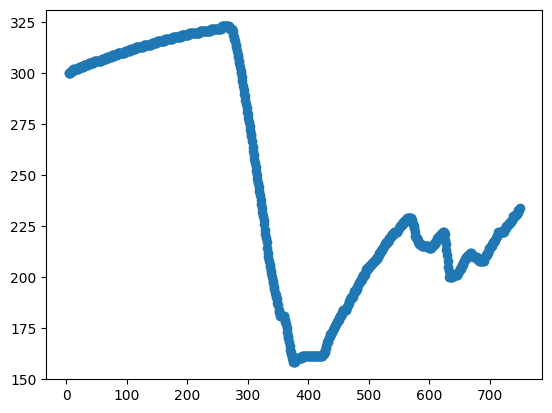

In [88]:
plt.plot(kk2['M_LAPDISTANCE_1'], kk2['M_SPEED_1'], marker = 'o')

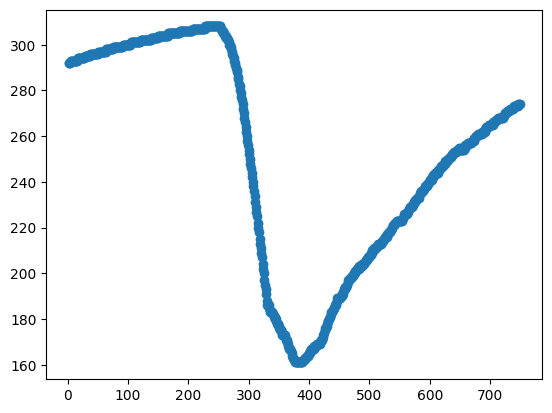

In [90]:
#plt.plot(kk['M_LAPDISTANCE_1'], kk['M_WORLDPOSITIONX_1'], marker = 'o')
plt.plot(kk['M_LAPDISTANCE_1'], kk['M_SPEED_1'], marker = 'o')


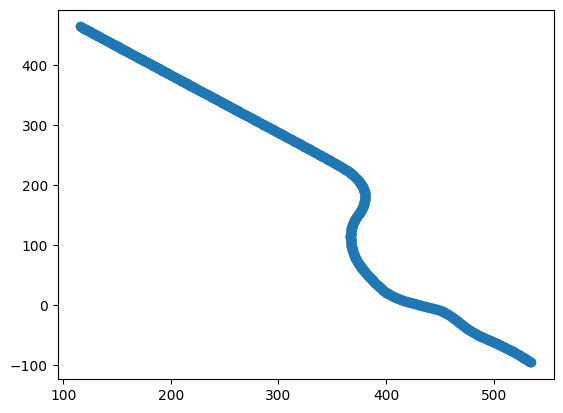

In [80]:
plt.scatter(kk2['M_WORLDPOSITIONX_1'], kk2['M_WORLDPOSITIONY_1'])

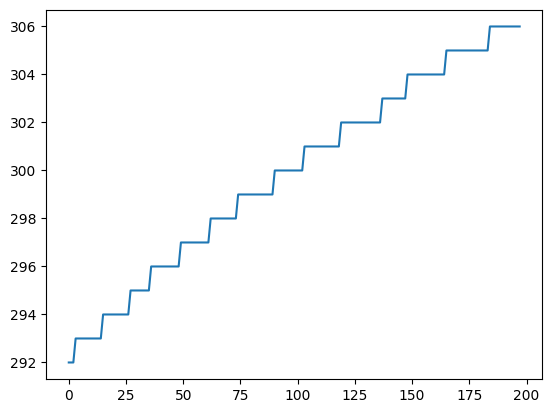

In [91]:
plt.plot(kk[kk['M_LAPDISTANCE_1'] < 200].reset_index()['M_SPEED_1'])

In [57]:
print(kk)

       ID                      SESSION_GUID  M_LAPTIMEINMS  M_LAPDISTANCE_1  \
0     NaN  1BF21BECE1C29DBFE0631718000AACA5          84622               82   
1     NaN  1BF21BECE1C29DBFE0631718000AACA5          84622               83   
2     NaN  1BF21BECE1C29DBFE0631718000AACA5          84622               84   
3     NaN  1BF21BECE1C29DBFE0631718000AACA5          84622               85   
4     NaN  1BF21BECE1C29DBFE0631718000AACA5          84622               86   
5     NaN  1BF21BECE1C29DBFE0631718000AACA5          84622              112   
6     NaN  1BF21BECE1C29DBFE0631718000AACA5          84622              113   
7     NaN  1BF21BECE1C29DBFE0631718000AACA5          84622              114   
8     NaN  1BF21BECE1C29DBFE0631718000AACA5          84622              115   
9     NaN  1BF21BECE1C29DBFE0631718000AACA5          84622              116   
10    NaN  1BF21BECE1C29DBFE0631718000AACA5          84622              137   
11    NaN  1BF21BECE1C29DBFE0631718000AACA5         

In [74]:
print(cleaned_2024[['SESSION_GUID','M_CURRENTLAPNUM']].drop_duplicates())

                           SESSION_GUID  M_CURRENTLAPNUM
0      1BF21BECE1C29DBFE0631718000AACA5                1
75     211C82236DA74918E0631218000A8592                1
421    211C98F7A4BA963EE0631218000AB662                1
796    21210D2279275E99E0631218000ADC94                1
987    211C109D003DE77BE0631218000A20E7                1
1202   211C98F7A4BA963EE0631218000AB662                2
1562   211D57789BB3E672E0631218000A3153                2
1607   211D57789BB3E672E0631218000A3153                4
1987   1BF21BECE1C29DBFE0631718000AACA5                2
2034   211C1464D105F8D6E0631218000A785F                2
2274   211C82236DA74918E0631218000A8592                3
2848   2123408F2C4B88E5E0631218000A651D                1
3148   21198A4F132E1402E0631218000AC59A                1
3265   211C1464D105F8D6E0631218000A785F                1
3585   211F74981597D869E0631218000A3CD3                1
4078   211C82236DA74918E0631218000A8592                2
4483   21198A4F132E1402E0631218

In [35]:
print(data_2024_cols[['SESSION_GUID', 'M_CURRENTLAPNUM']].drop_duplicates().reset_index())

      index                      SESSION_GUID  M_CURRENTLAPNUM
0         0  1BF21BECE1C29DBFE0631718000AACA5                1
1        75  211D33844084CBB8E0631218000A5F0C                3
2       714  212EDE1C166A7E72E0631218000AE3B4                1
3      1347  211C82236DA74918E0631218000A8592                1
4      1387  211C98F7A4BA963EE0631218000AB662                3
5      2625  211C98F7A4BA963EE0631218000AB662                1
6      3680  211C109D003DE77BE0631218000A20E7                2
7      3885  211C98F7A4BA963EE0631218000AB662                2
8      4522  211B5DC56375BBD0E0631218000AAA6D                2
9      5791  21210D2279275E99E0631218000ADC94                1
10     6351  211D56EB09F3D3F8E0631218000A5C63                1
11     6991  211D57789BB3E672E0631218000A3153                4
12     7631  211D57789BB3E672E0631218000A3153                6
13     8270  211B5DC56375BBD0E0631218000AAA6D                1
14     8900  211C109D003DE77BE0631218000A20E7          

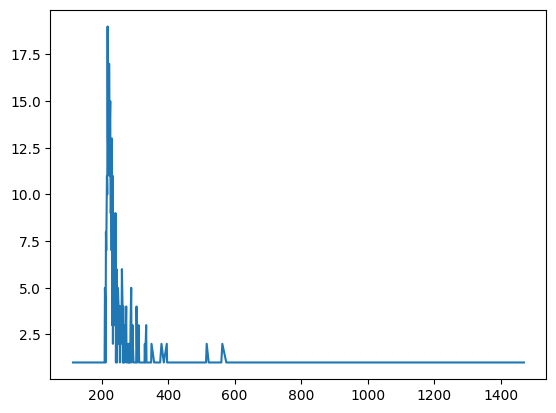

In [23]:
plt.plot(ll['count'], ll['count2'])

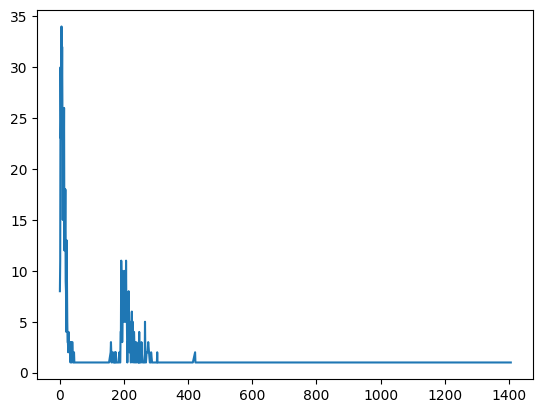

In [17]:
plt.plot(jj['count'], jj['count2'])

In [ ]:
cleaned_2022 = filter_laps()

In [29]:
cleaned_2022 = filter_laps(data_2022)

In [ ]:
cleaned_2022

SESSION_IDENTIFIER  FRAME  LAP_NUM  SECTOR  LAP_DISTANCE  \
286     10046447013921721147   1652        1       0      0.580389   
287     10046447013921721147   1653        1       0      4.607213   
288     10046447013921721147   1655        1       0      9.989393   
289     10046447013921721147   1657        1       0     14.036831   
290     10046447013921721147   1659        1       0     18.079540   
...                      ...    ...      ...     ...           ...   
721248   9988605802332392477   5030        2       2   5068.794922   
721249   9988605802332392477   5032        2       2   5072.460938   
721250   9988605802332392477   5034        2       2   5076.144531   
721251   9988605802332392477   5036        2       2   5081.075195   
721252   9988605802332392477   5038        2       2   5084.787109   

        CURRENT_LAP_TIME_MS  SECTOR_1_TIME_MS  SECTOR_2_TIME_MS  LAP_TIME_MS  \
286                       0             30395             18780        85724   
287                      50             30395             18780        85724   
288                     116             30395             18780        85724   
289                     166             30395             18780        85724   
290                     216             30395             18780        85724   
...                     ...               ...               ...          ...   
721248                89209             32563             18983        91857   
721249                89260             32563             18983        91857   
721250                89310             32563             18983        91857   
721251                89376             32563             18983        91857   
721252                89426             32563             18983        91857   

        SECTOR_3_MS  ...      ROLL   WORLDPOSX   WORLDPOSY  WORLDPOSZ  \
286           36549  ... -0.018526  111.150146  464.910126   2.947756   
287           36549  ... -0.018871  114.049080  462.116333   2.928383   
288           36549  ... -0.018871  117.922577  458.380981   2.890436   
289           36549  ... -0.018806  120.835716  455.572235   2.864503   
290           36549  ... -0.018476  123.746330  452.767700   2.843807   
...             ...  ...       ...         ...         ...        ...   
721248        40311  ... -0.027916  -37.301765  611.174988   3.016551   
721249        40311  ... -0.027945  -34.656796  608.636902   3.027945   
721250        40311  ... -0.028249  -31.990505  606.096863   3.039004   
721251        40311  ... -0.028124  -28.407696  602.708374   3.054863   
721252        40311  ...       NaN         NaN         NaN        NaN   

        WORLDFORWARDDIRX  WORLDFORWARDDIRY  WORLDFORWARDDIRZ  WORLDRIGHTDIRX  \
286             -23587.0            -123.0          -22743.0         22738.0   
287             -23579.0            -179.0          -22751.0         22745.0   
288             -23577.0            -202.0          -22753.0         22747.0   
289             -23587.0            -176.0          -22743.0         22737.0   
290             -23602.0            -159.0          -22728.0         22722.0   
...                  ...               ...               ...             ...   
721248          -23598.0             118.0          -22732.0         22726.0   
721249          -23714.0              85.0          -22611.0         22604.0   
721250          -23833.0             121.0          -22485.0         22479.0   
721251          -23894.0             111.0          -22421.0         22415.0   
721252               NaN               NaN               NaN             NaN   

        WORLDRIGHTDIRY  WORLDRIGHTDIRZ  
286              607.0        -23585.0  
287              618.0        -23578.0  
288              618.0        -23576.0  
289              616.0        -23586.0  
290              605.0        -23600.0  
...                ...             ...  
721248           914.0        -23586.0  
721249           915.0        -23703.0  
7

In [ ]:
def get_count_of_counts_moments(df):
    num_rows_2022 = number_of_moments_in_lap_section(df)
    return num_rows_2022.groupby(['count']).size().reset_index(name = 'count2').sort_values(by = 'count')

In [ ]:
get_count_of_counts_moments(data_2022)

count  count2
0        1       7
1        2      12
2        3      25
3        4      23
4        5      30
5        6      29
6        7      30
7        8      27
8        9      25
9       10      20
10      11      22
11      12      20
12      13      19
13      14      25
14      15      19
15      16      15
16      17      13
17      18      16
18      19       8
19      20      11
20      21       8
21      22       8
22      23      11
23      24       4
24      25       6
25      26       5
26      27       1
27      28       3
28      29       3
29      30       2
30      31       2
31      32       2
32      33       3
33      34       1
34      35       1
35      36       3
36      37       3
37      39       3
38      40       1
39      41       4
40      42       1
41      43       1
42      44       2
43      45       1
44      46       2
45      48       1
46      51       1
47      55       1
48      92       1
49      96       2
50     141       1
51     143       1
52     157       1
53     159       1
54     163       3
55     164       1
56     168       1
57     170       2
58     171       2
59     173       2
60     175       1
61     176       1
62     177       2
63     178       2
64     179       1
65     180       1
66     181       2
67     184       1
68     188       1
69     190       2
70     192       2
71     193       1
72     194       3
73     195       5
74     196       9
75     197       8
76     198      12
77     199       3
78     200       5
79     201       6
80     202       8
81     203       6
82     204       6
83     205       9
84     206       6
85     207       7
86     208       5
87     209       4
88     210       4
89     211      12
90     212       5
91     213       7
92     214       5
93     215       2
94     216       1
95     217       5
96     218       2
97     219       8
98     220       2
99     221       7
100    222       1
101    223       4
102    224       4
103    225       2
104    226       1
105    227       2
106    228       5
107    229       6
108    230       3
109    231       8
110    232       1
111    233       5
112    234       2
113    235       2
114    236       1
115    237       3
116    239       1
117    240       2
118    241       1
119    242       1
120    243       3
121    244       1
122    247       1
123    248       1
124    249       1
125    250       1
126    251       2
127    252       3
128    253       2
129    254       1
130    256       1
131    259       1
132    260       1
133    261       2
134    262       2
135    263       1
136    265       1
137    267       1
138    268       1
139    269       2
140    270       1
141    271       1
142    272       4
143    273       1
144    274       3
145    275       1
146    276       1
147    277       1
148    278       2
149    279       1
150    280       1
151    281       3
152    282       1
153    286       1
154    287       1
155    288       1
156    290       2
157    293       1
158    294       1
159    297       1
160    298       2
161    299       1
162    305       1
163    310       3
164    311       1
165    313       1
166    316       2
167    317       1
168    329       1
169    330       1
170    333       1
171    334       1
172    343       1
173    362       1
174    388       1
175    403       3
176    409       1
177    413       1
178    423       1
179    426       1
180    428       2
181    449       1
182    451       1
183    460       1
184    474       1
185    488       1
186    511       1
187    526       1
188    568       1
189    596       1
190    601       1
191    605       1
192    616       1
193    731       1
194    735       1
195    801       1
196    906       1
197    972       1
198   1061       1
199   1420       1

In [ ]:
get_count_of_counts_moments(cleaned_2022)

count  count2
0      170       1
1      188       1
2      190       2
3      194       1
4      195       5
5      196       8
6      197       7
7      198      10
8      199       1
9      200       2
10     201       5
11     202       7
12     203       4
13     204       4
14     205       7
15     206       5
16     207       7
17     208       5
18     209       4
19     210       2
20     211      11
21     212       4
22     213       3
23     214       5
24     215       1
25     216       1
26     217       5
27     218       2
28     219       6
29     220       2
30     221       6
31     223       3
32     224       3
33     225       2
34     226       1
35     227       1
36     228       4
37     229       4
38     230       2
39     231       6
40     232       1
41     233       5
42     234       2
43     235       2
44     236       1
45     237       1
46     240       2
47     241       1
48     242       1
49     243       2
50     244       1
51     247       1
52     248       1
53     249       1
54     250       1
55     252       3
56     253       2
57     254       1
58     256       1
59     259       1
60     260       1
61     261       2
62     262       1
63     265       1
64     267       1
65     269       2
66     270       1
67     271       1
68     272       3
69     273       1
70     274       3
71     276       1
72     277       1
73     278       2
74     279       1
75     280       1
76     281       2
77     282       1
78     286       1
79     287       1
80     288       1
81     290       2
82     293       1
83     294       1
84     297       1
85     298       2
86     299       1
87     305       1
88     310       3
89     311       1
90     316       2
91     317       1
92     329       1
93     330       1
94     334       1
95     343       1
96     388       1
97     403       1
98     413       1
99     423       1
100    428       2
101    451       1
102    460       1
103    474       1
104    488       1
105    511       1
106    526       1
107    568       1
108    596       1
109    601       1
110    605       1
111    616       1
112    731       1
113    735       1
114    801       1
115    906       1
116    972       1
117   1061       1
118   1420       1

In [ ]:
cleaned_2022

KeyboardInterrupt: 

In [ ]:
cleaned_2022.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).ngroups

265

In [ ]:
data_2022.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).ngroups

841

In [ ]:
cleaned_2023 = filter_laps(data_2023)

In [ ]:
cleaned_2023.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).ngroups

477

In [ ]:
data_2023.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).ngroups

519

In [ ]:
cleaned_2022

In [ ]:
num_rows_2022.sort_values(by = 'count')

SESSION_IDENTIFIER  LAP_NUM  count
598  13313819473625198429        2      1
627  14101162133662852328        2      1
327   8063708840847893586        1      1
68    1557190409152768838        2      1
684  15092605514731043955        2      1
774  17157707399482106195        1      1
283   7113785892660343799        2      1
33     755112501875431104        5      1
612  13665495347799952642        1      2
490  10852068761091482173        2      2
796  17157707399482106195       23      2
280   6963117383610621324        3      2
476  10753802066747140976        4      2
780  17157707399482106195        7      2
400   9465916990288652900        4      2
773  17085368131104337837        4      2
661  14867091609461434154        1      2
782  17157707399482106195        9      2
786  17157707399482106195       13      2
313   7766698783704954617        1      3
281   6963117383610621324        4      3
48     969981962781398943        2      3
431  10146015605034850001        2      3
622  14054303838250777198        1      3
278   6963117383610621324        1      3
776  17157707399482106195        3      3
779  17157707399482106195        6      3
398   9465916990288652900        2      3
663  14867091609461434154        3      3
662  14867091609461434154        2      3
658  14810318536041258717        1      3
785  17157707399482106195       12      3
787  17157707399482106195       14      3
798  17157707399482106195       25      3
358   8641593758334868648        1      3
775  17157707399482106195        2      3
320   7863359324834367849        1      3
790  17157707399482106195       17      3
185   3707949941588522956        2      3
31     755112501875431104        3      3
234   4966808428094383208        6      3
29     755112501875431104        1      3
28     753775121808026769        3      3
151   3234027093138609825        2      3
597  13313819473625198429        1      3
184   3707949941588522956        1      3
517  11545411770557016999        3      3
576  12869129974679448184       12      3
727  15796937250996462587        3      3
725  15796937250996462587        1      4
231   4966808428094383208        3      4
726  15796937250996462587        2      4
157   3476368200134644004        2      4
167   3556231802629273611        2      4
553  12637671068250572317        2      4
795  17157707399482106195       22      4
794  17157707399482106195       21      4
644  14576698226460287135        2      4
375   9106591872117064313        2      4
6      208613141800161118        1      4
399   9465916990288652900        3      4
613  13665495347799952642        2      4
279   6963117383610621324        2      4
465  10680305938660818401        1      4
373   9019675324294395724        2      4
30     755112501875431104        2      4
475  10753802066747140976        3      4
588  13003187873328127018        1      4
703  15296206237072498459        6      4
698  15296206237072498459        1      4
328   8063708840847893586        2      4
700  15296206237072498459        3      4
699  15296206237072498459        2      5
212   4717186482012769511        3      5
321   7863359324834367849        2      5
347   8432276935815560349        3      5
693  15225371958726791735        3      5
777  17157707399482106195        4      5
152   3317974545113175023        1      5
294   7442610971980829646        1      5
244   5518919727468967939        1      5
314   7766698783704954617        2      5
691  15225371958726791735        1      5
182   3659811147304140232        1      5
49     981704774559271235        1      5
35     757670479798714798        2      5
470  10716219660118776868        2      5
525  11720478011935173326        1      5
411   9763243025366720214        1      5
389   9363995516070094060        2      5
424  10045550089308107275        2      5
797  17157707399482106195       24      5
376   9106591872117064313        3      5
534  12116438763767752064        1      5
440  103036996808

total braking/acceleration

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import simps

def calculate_area(df: pd.DataFrame, start: float, end: float, feature: str) -> float:
    """
    Args:
        df (pd.DataFrame): a dataframe containing a single lap of data
        start (float): the starting lap distance
        end (float): the ending lap distance
        feature (str): the column being calculated on (probably only either throttle or brake)

    Returns:
        the total throttle/brake between these points for this lap
    
    Finds the 'total' braking/throttle for a given lap between two lap distances

    """
    df = df.sort_values('LAP_DISTANCE')

    if start not in df['LAP_DISTANCE'].values:
        start_throttle = np.interp(start, df['LAP_DISTANCE'], df[feature])
        df_start = pd.DataFrame({'LAP_DISTANCE': [start], feature: [start_throttle]})
        df = pd.concat([df, df_start]).sort_values('LAP_DISTANCE')
    
    if end not in df['LAP_DISTANCE'].values:
        end_throttle = np.interp(end, df['LAP_DISTANCE'], df[feature])
        df_end = pd.DataFrame({'LAP_DISTANCE': [end], feature: [end_throttle]})
        df = pd.concat([df, df_end]).sort_values('LAP_DISTANCE')

    df_filtered = df[(df['LAP_DISTANCE'] >= start) & (df['LAP_DISTANCE'] <= end)]

    area = np.trapz(df_filtered[feature], df_filtered['LAP_DISTANCE'])
    
    return area


In [ ]:
test = data_2022[(data_2022['SESSION_IDENTIFIER'] == 10046447013921721147) & (data_2022['LAP_NUM'] == 1)]


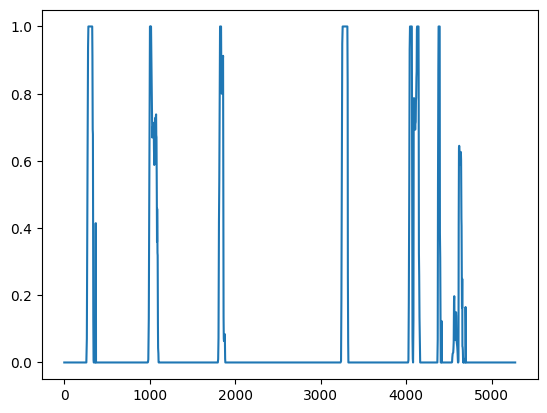

In [ ]:
plt.plot(test['LAP_DISTANCE'], test['BRAKE'])

In [ ]:
calculate_area(test, 0, 100, 'BRAKE')

0.0

In [ ]:
data_2022


SESSION_IDENTIFIER  FRAME  LAP_NUM  SECTOR  LAP_DISTANCE  \
0       10045550089308107275   1403        1       0    243.045959   
1       10045550089308107275   1408        1       0    266.444916   
2       10045550089308107275   1416        1       0    297.438477   
3       10045550089308107275   1418        1       0    306.238770   
4       10045550089308107275   1470        1       0    441.464752   
...                      ...    ...      ...     ...           ...   
721248   9988605802332392477   5030        2       2   5068.794922   
721249   9988605802332392477   5032        2       2   5072.460938   
721250   9988605802332392477   5034        2       2   5076.144531   
721251   9988605802332392477   5036        2       2   5081.075195   
721252   9988605802332392477   5038        2       2   5084.787109   

        CURRENT_LAP_TIME_MS  SECTOR_1_TIME_MS  SECTOR_2_TIME_MS  LAP_TIME_MS  \
0                      2844             29433             18320        86008   
1                      3111             29433             18320        86008   
2                      3486             29433             18320        86008   
3                      3603             29433             18320        86008   
4                      6106             29433             18320        86008   
...                     ...               ...               ...          ...   
721248                89209             32563             18983        91857   
721249                89260             32563             18983        91857   
721250                89310             32563             18983        91857   
721251                89376             32563             18983        91857   
721252                89426             32563             18983        91857   

        SECTOR_3_MS  ...      ROLL   WORLDPOSX   WORLDPOSY  WORLDPOSZ  \
0             38255  ... -0.023934  287.412811  298.471619   1.760029   
1             38255  ... -0.021614  304.667603  282.659576   1.781548   
2             38255  ... -0.018019  326.941986  261.094025   1.882867   
3             38255  ... -0.015977  333.254730  254.958725   1.920085   
4             38255  ... -0.012085  370.639648  141.009048   2.337044   
...             ...  ...       ...         ...         ...        ...   
721248        40311  ... -0.027916  -37.301765  611.174988   3.016551   
721249        40311  ... -0.027945  -34.656796  608.636902   3.027945   
721250        40311  ... -0.028249  -31.990505  606.096863   3.039004   
721251        40311  ... -0.028124  -28.407696  602.708374   3.054863   
721252        40311  ...       NaN         NaN         NaN        NaN   

        WORLDFORWARDDIRX  WORLDFORWARDDIRY  WORLDFORWARDDIRZ  WORLDRIGHTDIRX  \
0               -24167.0             -12.0          -22126.0         22120.0   
1               -23858.0             105.0          -22460.0         22456.0   
2               -23467.0             101.0          -22867.0         22865.0   
3               -23584.0             172.0          -22747.0         22746.0   
4                10302.0            -150.0          -31104.0         31103.0   
...                  ...               ...               ...             ...   
721248          -23598.0             118.0          -22732.0         22726.0   
721249          -23714.0              85.0          -22611.0         22604.0   
721250          -23833.0             121.0          -22485.0         22479.0   
721251          -23894.0             111.0          -22421.0         22415.0   
721252               NaN               NaN               NaN             NaN   

        WORLDRIGHTDIRY  WORLDRIGHTDIRZ  
0                784.0        -24160.0  
1                708.0        -23851.0  
2                590.0        -23462.0  
3                523.0        -23579.0  
4                395.0         10300.0  
...                ...             ...  
721248           914.0        -23586.0  
721249           915.0        -23703.0  
7

In [ ]:
data_2022.columns

Index(['SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR', 'LAP_DISTANCE',
       'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS', 'SECTOR_2_TIME_MS',
       'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH', 'THROTTLE', 'BRAKE', 'GEAR',
       'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH', 'ROLL', 'WORLDPOSX',
       'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY',
       'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY',
       'WORLDRIGHTDIRZ'],
      dtype='object')

In [ ]:
data_2022['']

In [31]:
import numpy as np
import pandas as pd

def calculate_car_directions(df):
    """
    Calculate car directions based on world forward direction vectors 
    and interpolated position changes in a pandas DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY',
                       'WORLDPOSX', and 'WORLDPOSY' columns.
    
    Returns:
    pd.DataFrame: DataFrame with new columns 'direction_forward_deg' and 'direction_position_deg'.
    """
    
    # Calculate direction based on world forward direction vectors
    df['direction_forward'] = np.arctan2(df['Combined_Y'], df['Combined_X'])
    df['direction_forward_deg'] = np.degrees(df['direction_forward'])
    
    # Calculate the change in world positions
    df['delta_posx'] = df['WORLDPOSX'].diff()
    df['delta_posy'] = df['WORLDPOSY'].diff()
    
    # Calculate direction based on interpolated world positions
    df['direction_position'] = np.arctan2(df['delta_posy'], df['delta_posx'])
    df['direction_position_deg'] = np.degrees(df['direction_position'])
    
    # Dropping intermediate columns (optional)
    #df.drop(columns=['direction_forward', 'direction_position'], inplace=True)
    
    return df


In [ ]:
def add_combined_directions(df):
    df['Combined_X'] = df['WORLDFORWARDDIRX'] + df['WORLDRIGHTDIRX']
    df['Combined_Y'] = df['WORLDFORWARDDIRY'] + df['WORLDRIGHTDIRY']
    return df

In [32]:
new_directions = add_combined_directions(cleaned_2022)
new_directions = calculate_car_directions(new_directions)

In [33]:
single_new_direction = new_directions[(new_directions['SESSION_IDENTIFIER'] == 10046447013921721147) & (new_directions['LAP_NUM'] == 1)]


In [ ]:
new_directions.columns

Index(['SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR', 'LAP_DISTANCE',
       'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS', 'SECTOR_2_TIME_MS',
       'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH', 'THROTTLE', 'BRAKE', 'GEAR',
       'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH', 'ROLL', 'WORLDPOSX',
       'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY',
       'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY',
       'WORLDRIGHTDIRZ', 'direction_forward_deg', 'delta_posx', 'delta_posy',
       'direction_position_deg', 'direction_forward', 'direction_position',
       'Combined_X', 'Combined_Y'],
      dtype='object')

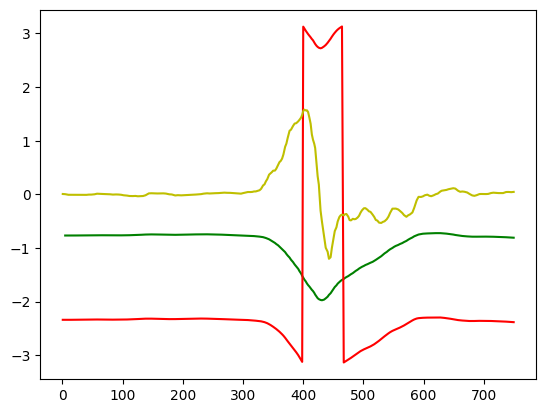

In [38]:
#plt.plot(single_new_direction['LAP_DISTANCE'], single_new_direction['direction_forward'], 'b')
single_new_direction= single_new_direction[single_new_direction['LAP_DISTANCE']< 750]
plt.plot(single_new_direction['LAP_DISTANCE'], single_new_direction['direction_position'], 'g')
plt.plot(single_new_direction['LAP_DISTANCE'], single_new_direction['YAW'], 'r')
plt.plot(single_new_direction['LAP_DISTANCE'], single_new_direction['STEERING'] *np.pi, 'y')

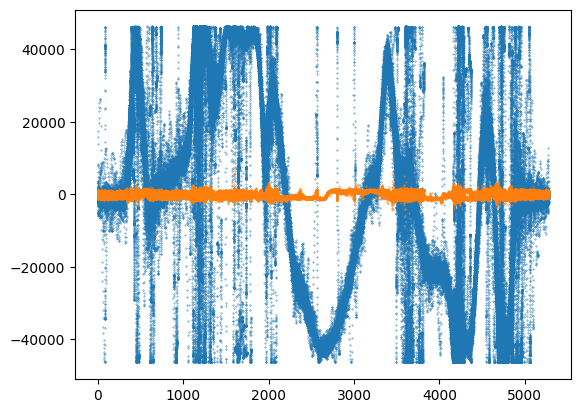

In [ ]:
plt.scatter(cleaned_2022['LAP_DISTANCE'], cleaned_2022['Combined_X'], s=0.1)
plt.scatter(cleaned_2022['LAP_DISTANCE'], cleaned_2022['Combined_Y'], s=0.1)

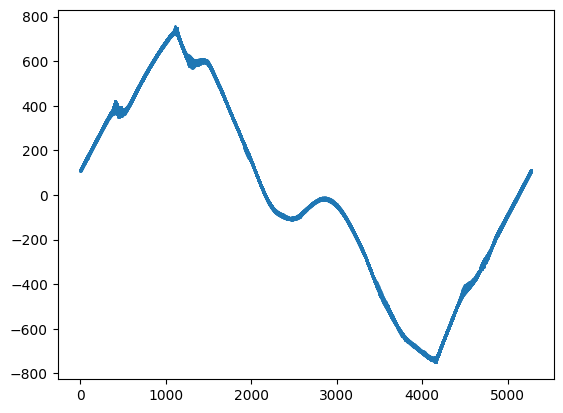

In [ ]:
plt.scatter(cleaned_2022['LAP_DISTANCE'], cleaned_2022['WORLDPOSX'], s=0.1)

In [7]:
import pandas as pd
raw_2023 = pd.read_csv('./../f1sim-data-2023.csv')

In [9]:
raw_2023.columns

Index(['SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR', 'LAP_DISTANCE',
       'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS', 'SECTOR_2_TIME_MS',
       'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH', 'THROTTLE', 'BRAKE', 'GEAR',
       'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH', 'ROLL', 'WORLDPOSX',
       'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY',
       'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY',
       'WORLDRIGHTDIRZ'],
      dtype='object')

In [ ]:
raw_2023['']